#Proyecto Final
## Introduccion a la ciencia de datos
##**Predictor de estado tumoral benigno o maligno en cancer de mamá**




**Objetivo**: Predecir si el cáncer es benigno o maligno.\
Desarrollar un modelo predictivo basado en técnicas de ciencia de datos que permita clasificar de manera precisa y eficiente los tumores de cáncer de mama como benignos o malignos, utilizando un conjunto de datos con características detalladas de los tumores,contribuyendo así a la detección temprana y al tratamiento eficaz del cáncer de mama. Los datos se recuperaron de https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data.


In [87]:
#librerias
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import tree

In [251]:
#leemos el data y lo visualizamos con pandas
data = pd.read_csv("data.csv")

#**Visualizamos datos (EDA)**

In [255]:
data.head(5)
#M=maligno, B=benigno

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
len(data.columns)

33

In [253]:
for i in data:
  print('datos unicos en:',i, len(data[i].unique()))

datos unicos en: id 569
datos unicos en: diagnosis 2
datos unicos en: radius_mean 456
datos unicos en: texture_mean 479
datos unicos en: perimeter_mean 522
datos unicos en: area_mean 539
datos unicos en: smoothness_mean 474
datos unicos en: compactness_mean 537
datos unicos en: concavity_mean 537
datos unicos en: concave points_mean 542
datos unicos en: symmetry_mean 432
datos unicos en: fractal_dimension_mean 499
datos unicos en: radius_se 540
datos unicos en: texture_se 519
datos unicos en: perimeter_se 533
datos unicos en: area_se 528
datos unicos en: smoothness_se 547
datos unicos en: compactness_se 541
datos unicos en: concavity_se 533
datos unicos en: concave points_se 507
datos unicos en: symmetry_se 498
datos unicos en: fractal_dimension_se 545
datos unicos en: radius_worst 457
datos unicos en: texture_worst 511
datos unicos en: perimeter_worst 514
datos unicos en: area_worst 544
datos unicos en: smoothness_worst 411
datos unicos en: compactness_worst 529
datos unicos en: conca

In [203]:
#observamos el dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [93]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


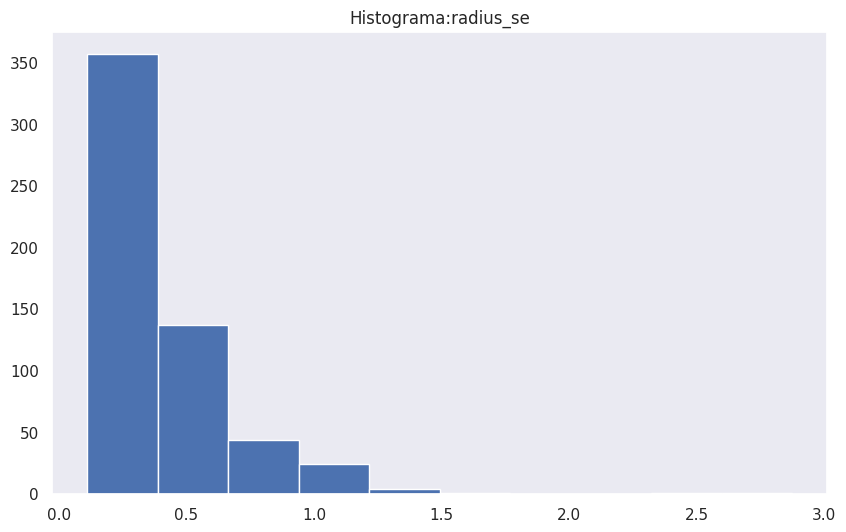

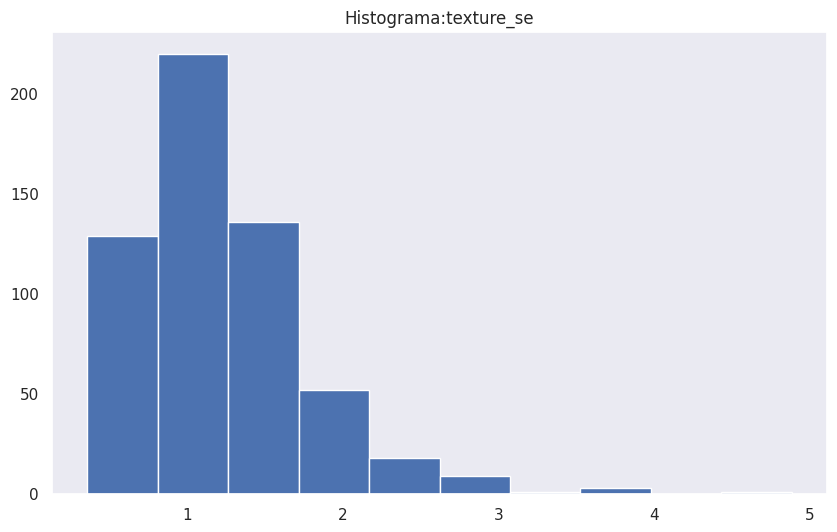

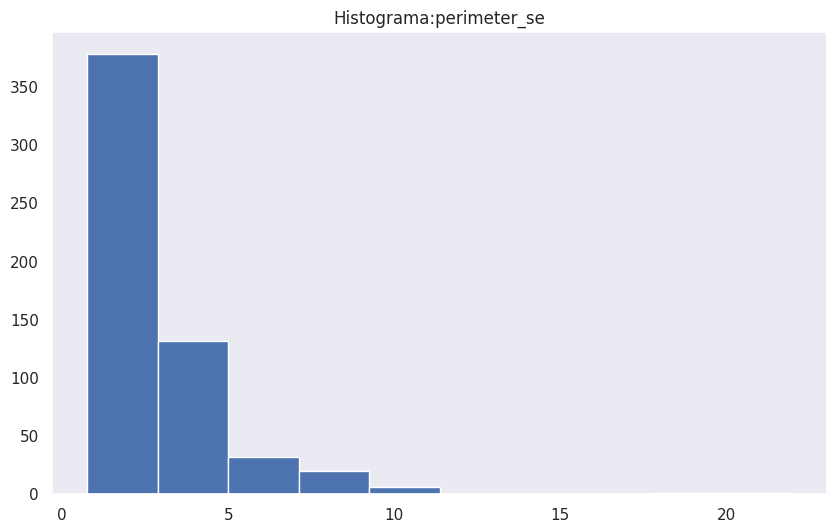

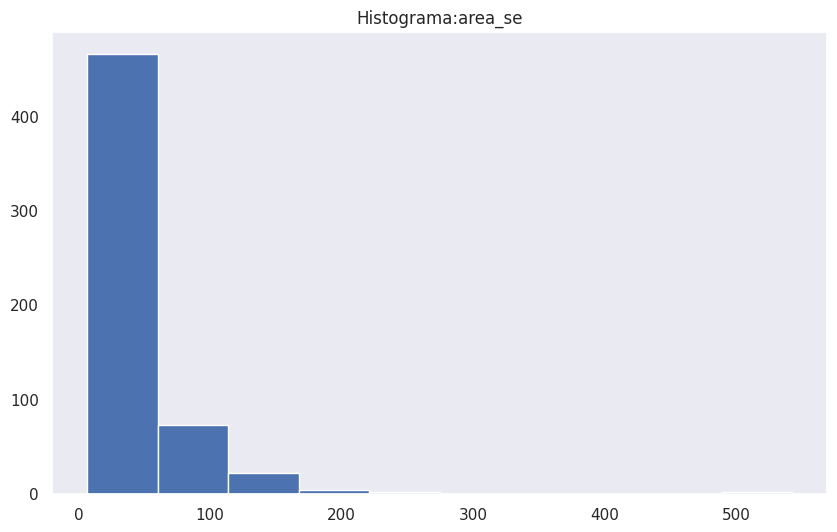

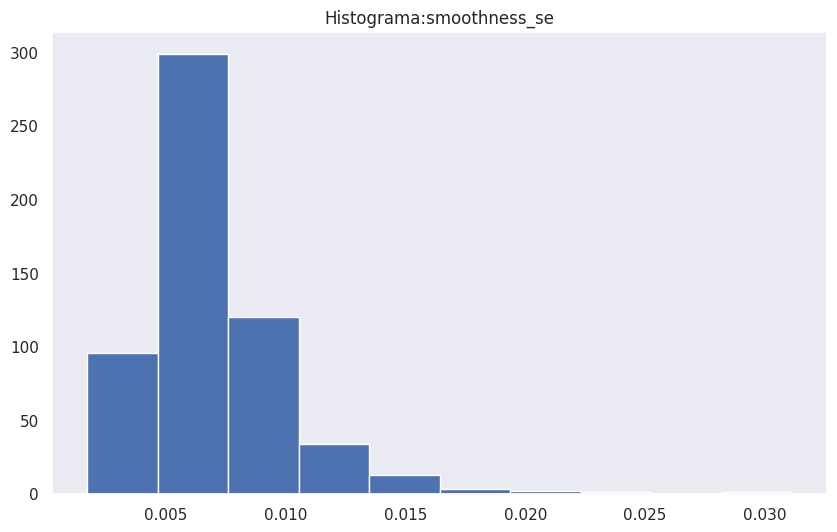

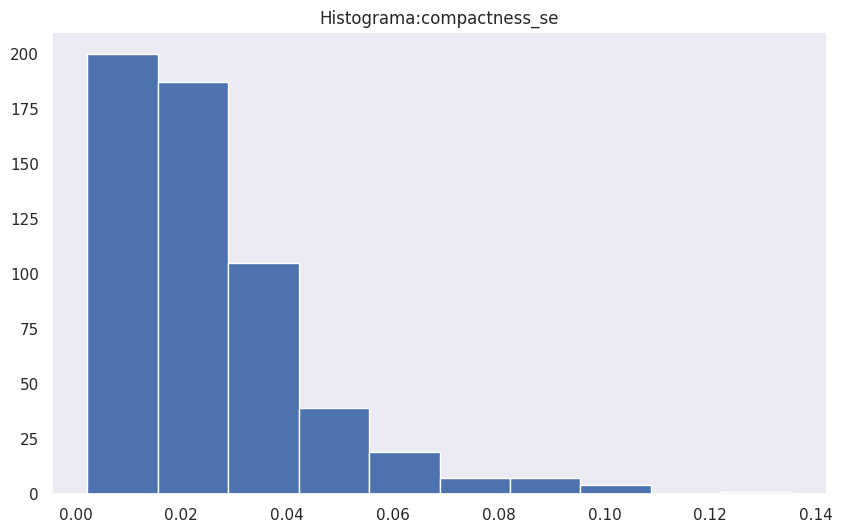

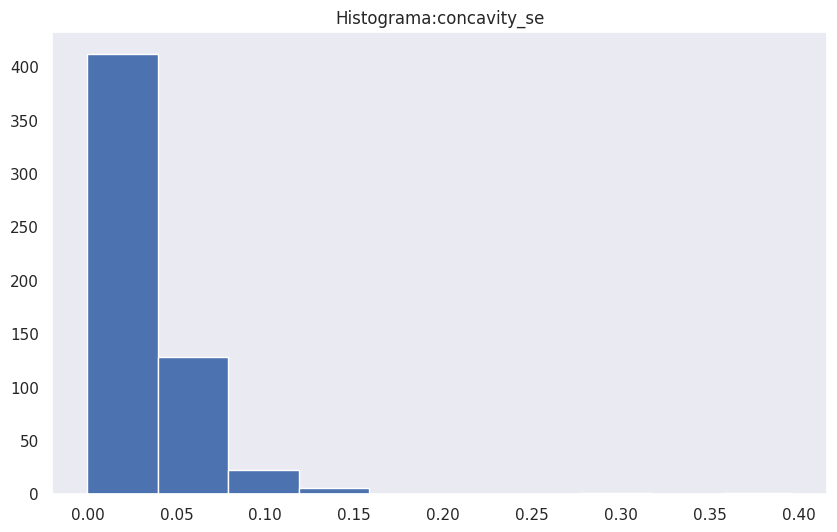

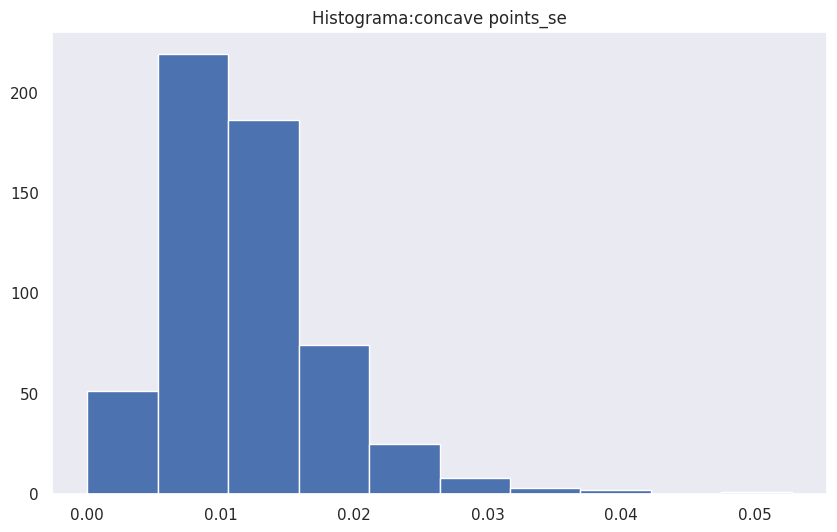

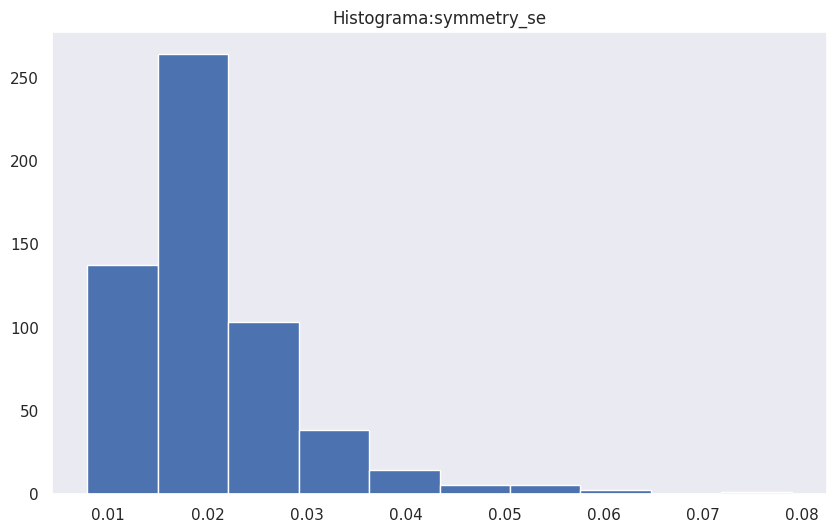

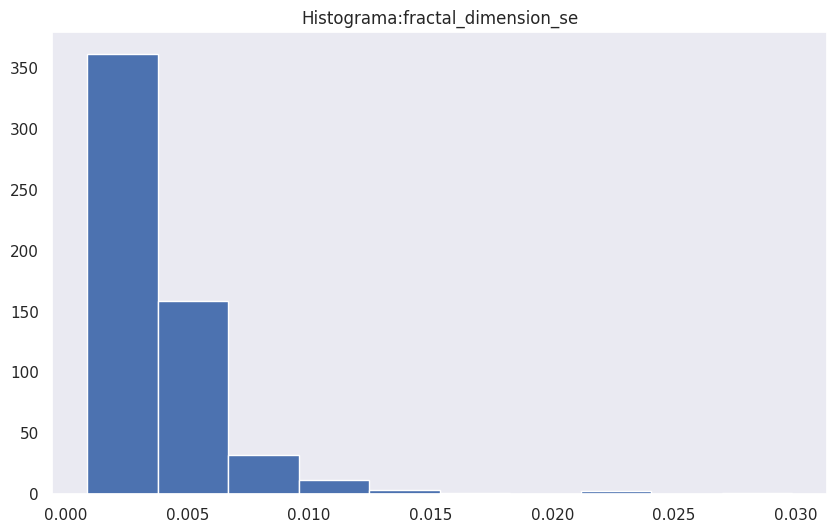

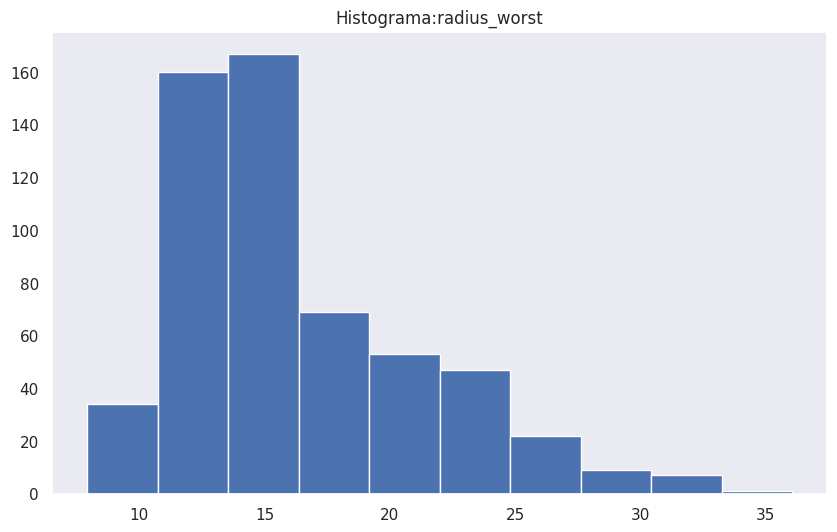

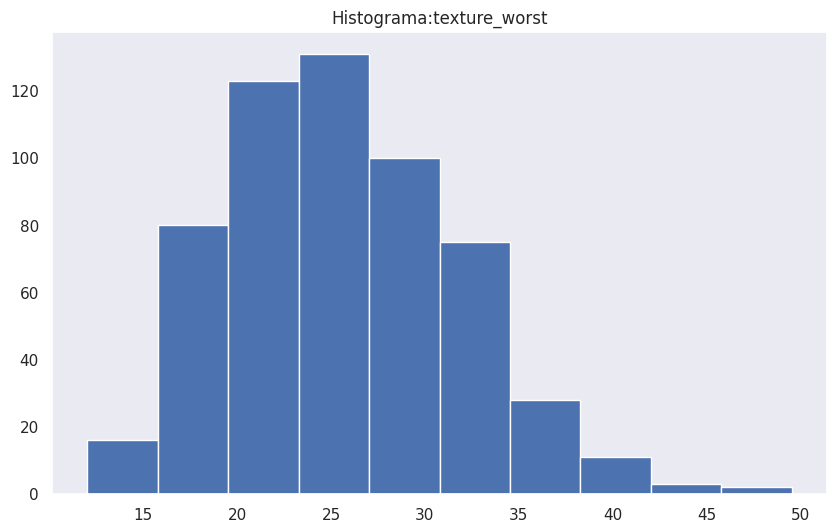

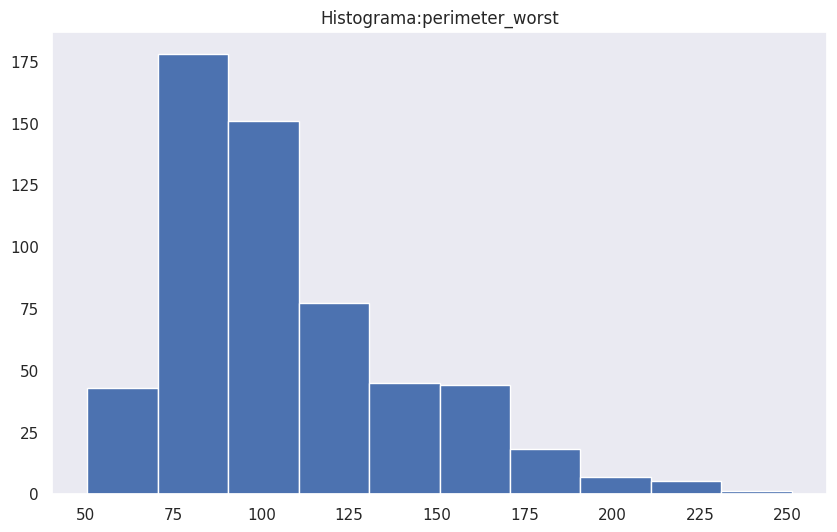

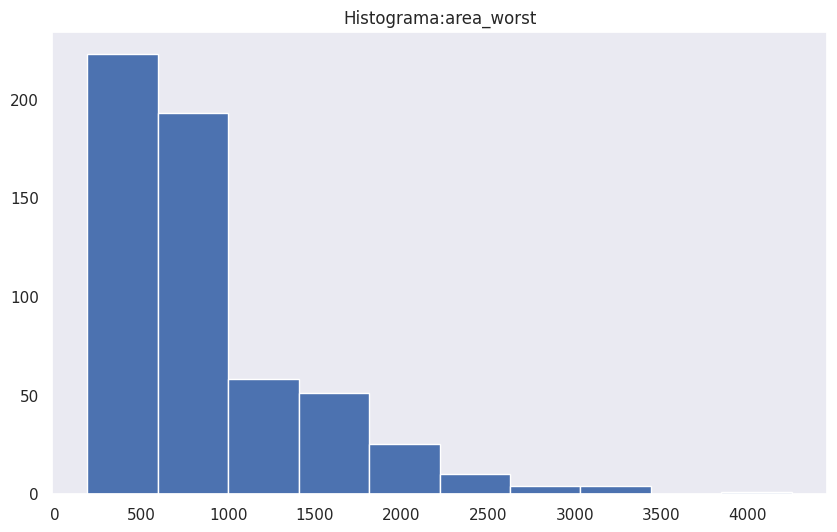

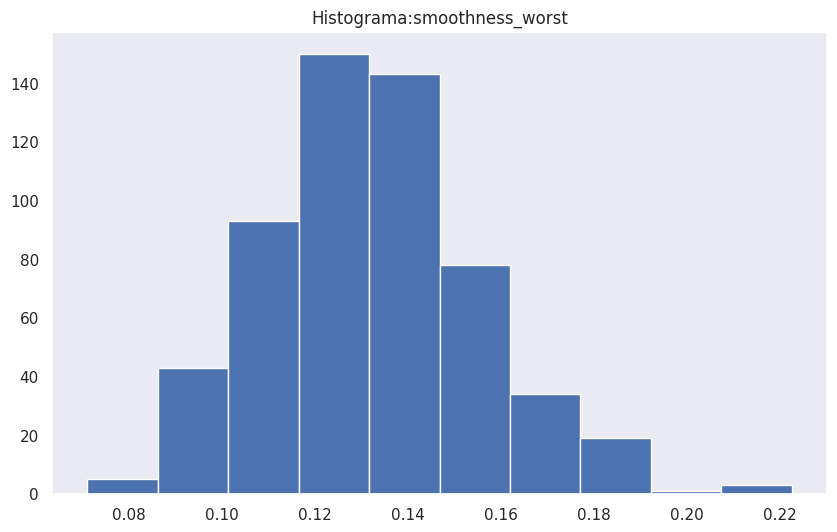

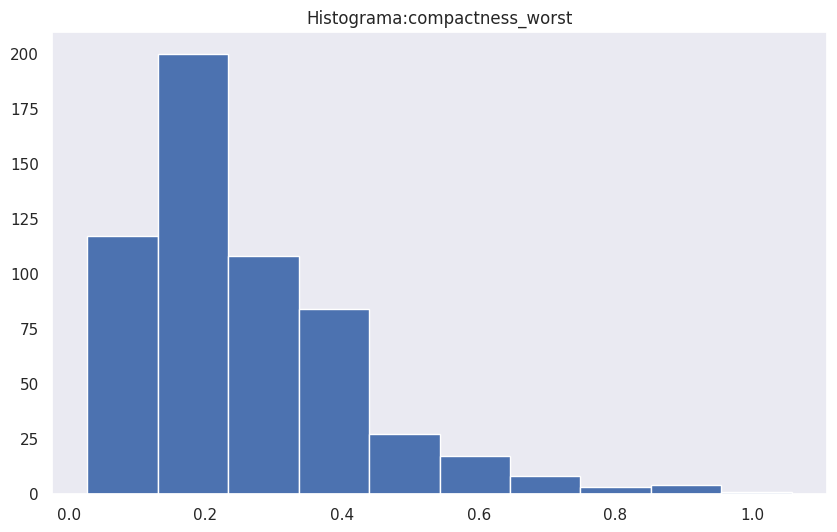

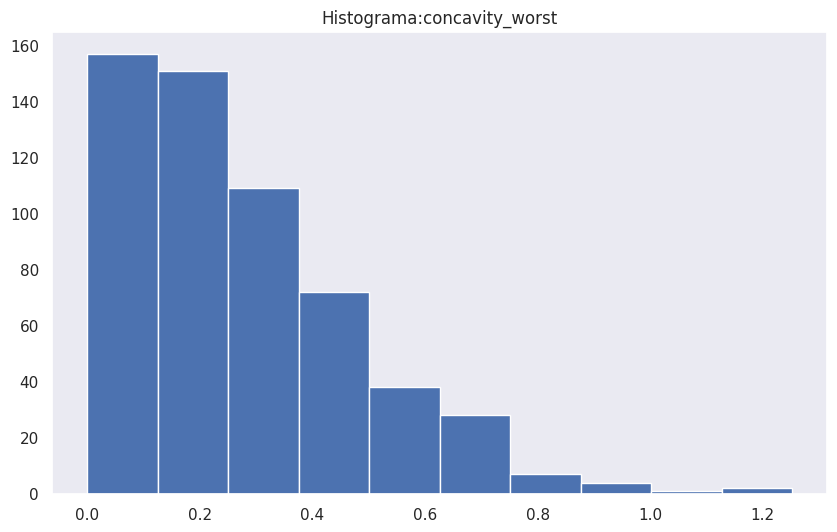

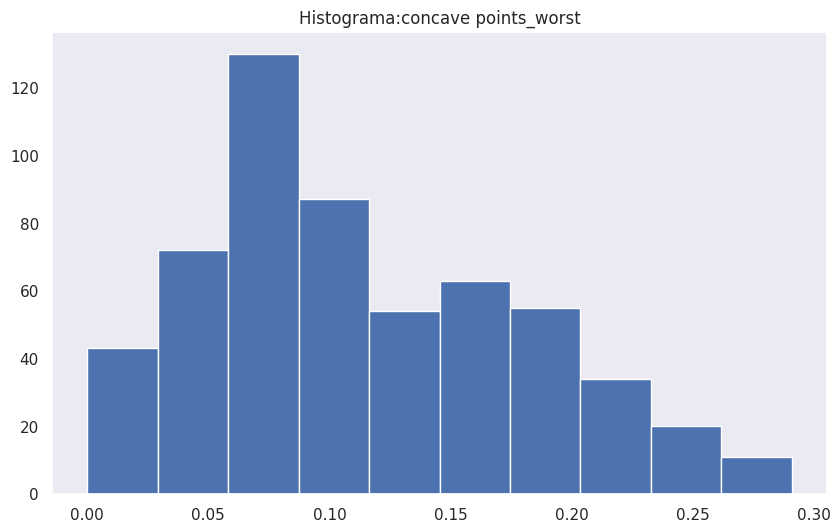

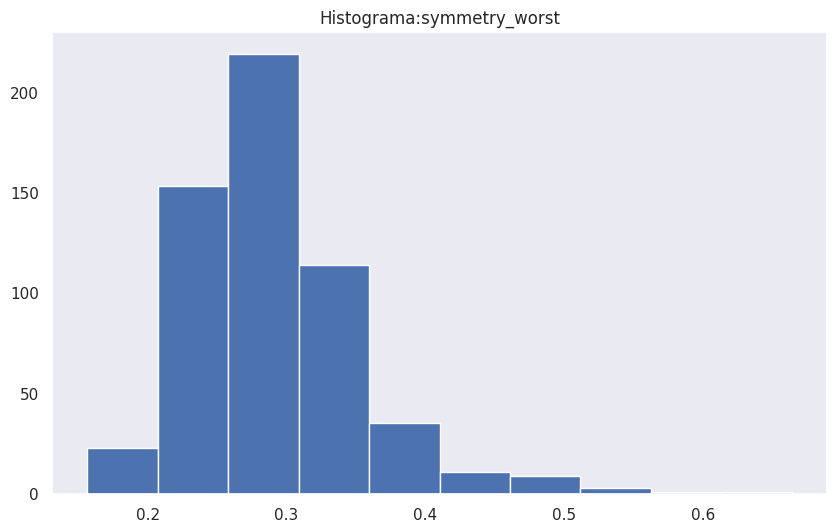

KeyboardInterrupt: 

In [256]:
#definicion de las variables numericas y categoricas del DataFrame
varibles_numericas1 = data.select_dtypes(include = [np.number])
variables_categoricas2 = data.select_dtypes(exclude= [np.number])

#se viasualizan los histogramas de cada columna
for i in varibles_numericas1:
  plt.title('Histograma:'+i)
  plt.hist(data[i])
  plt.grid()
  plt.show()

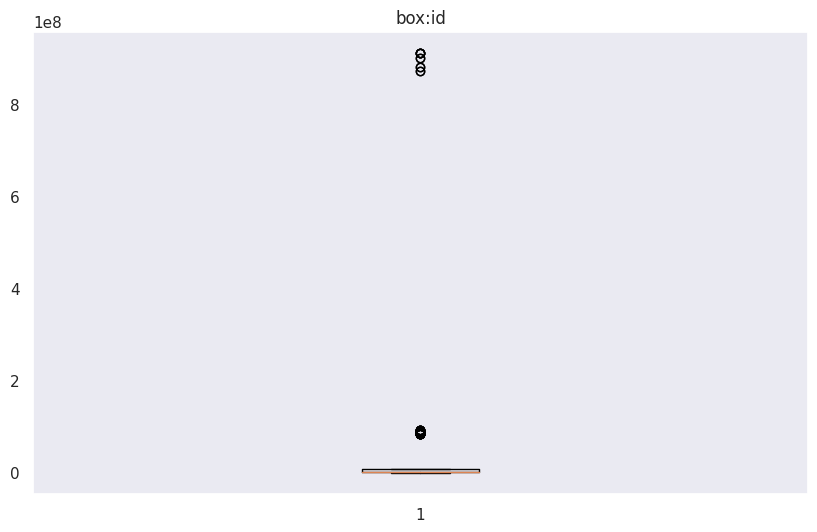

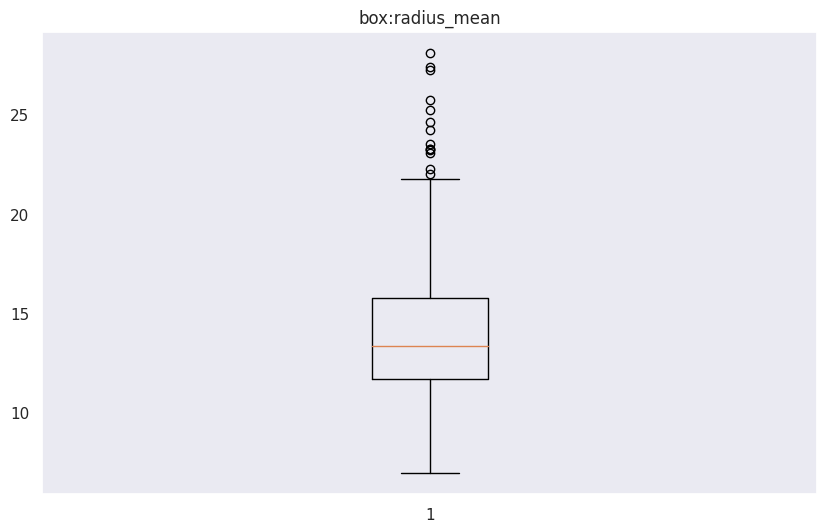

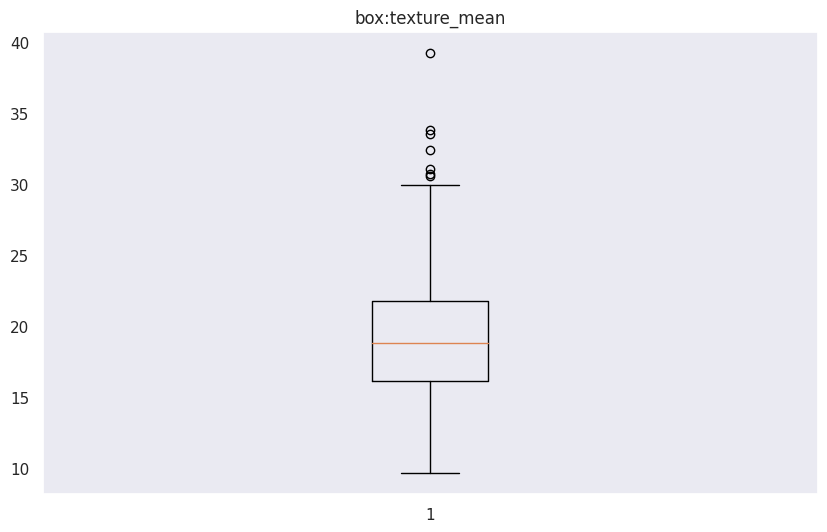

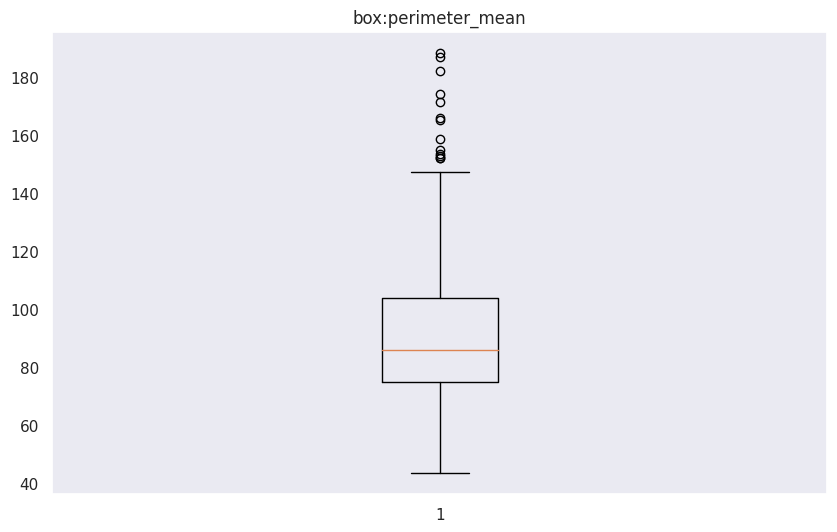

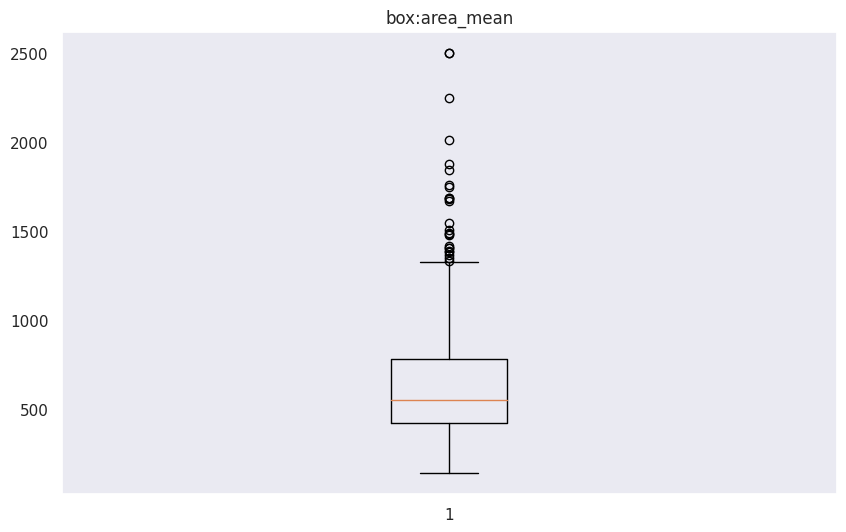

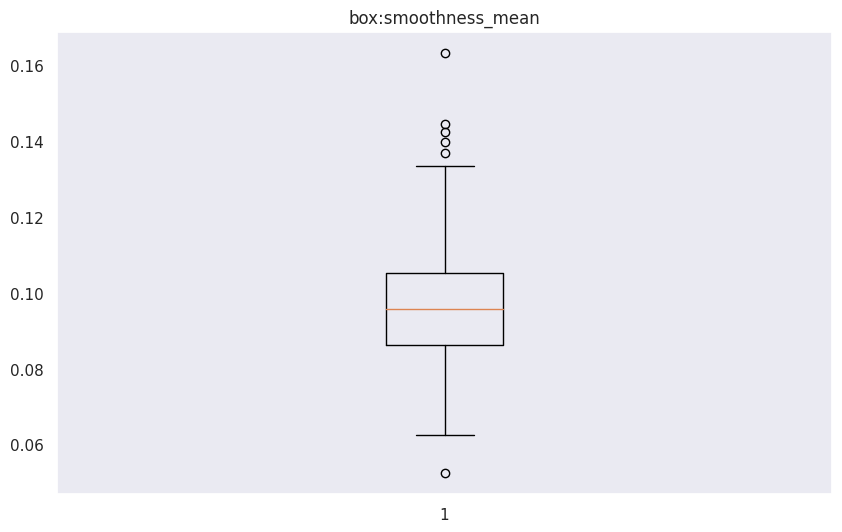

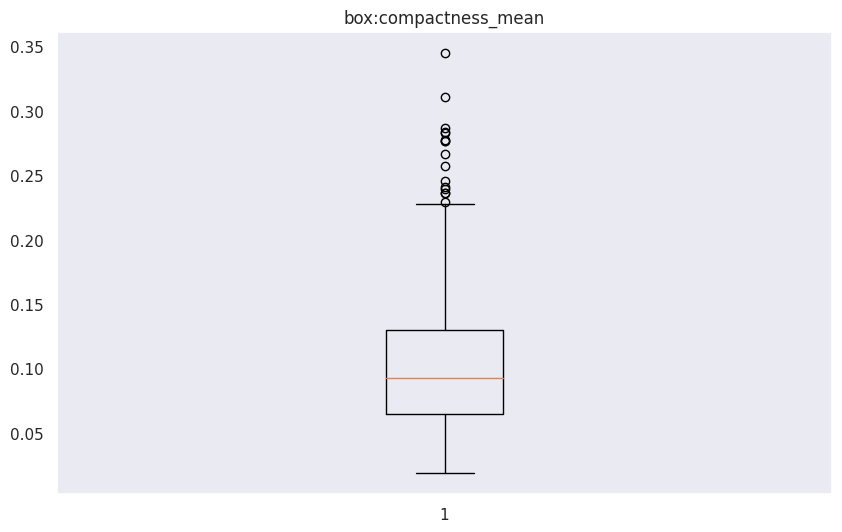

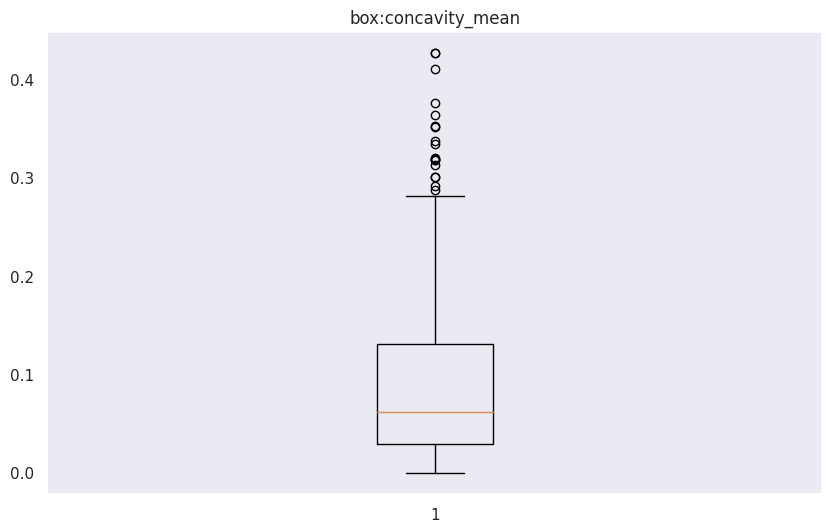

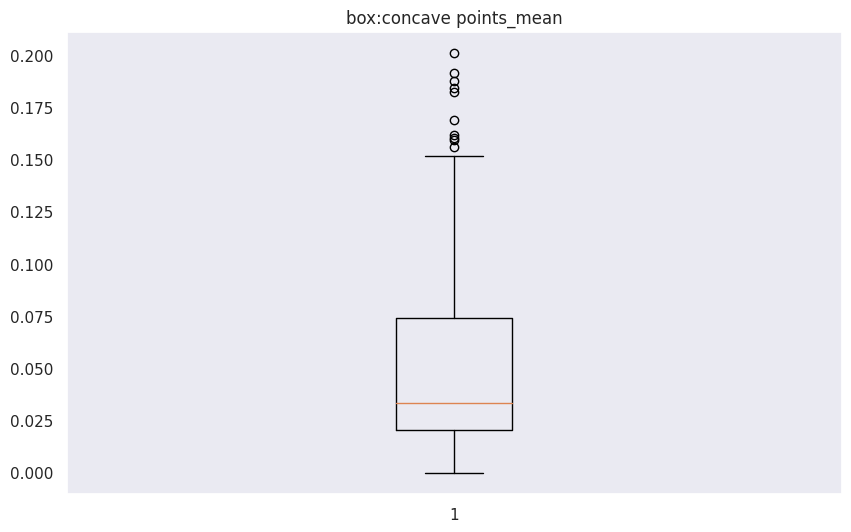

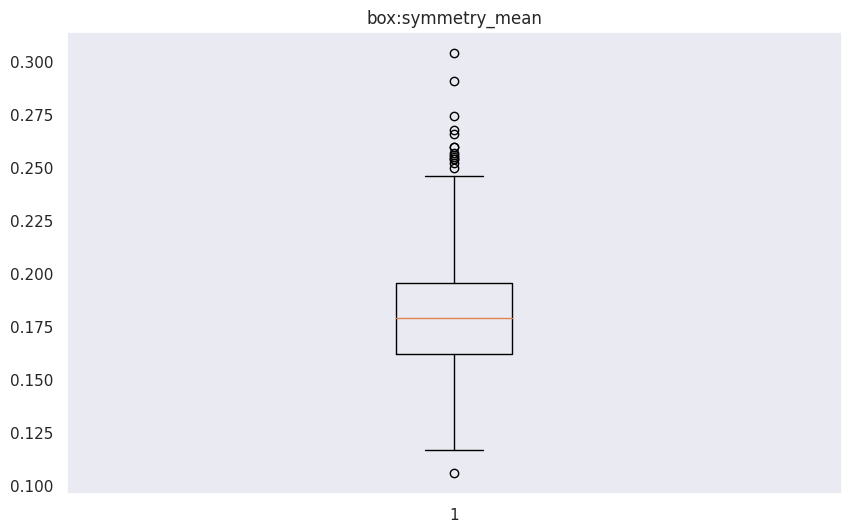

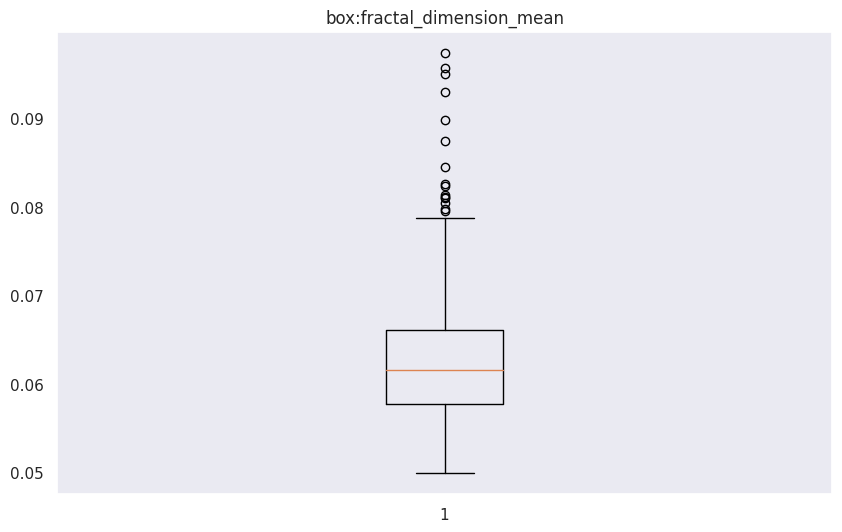

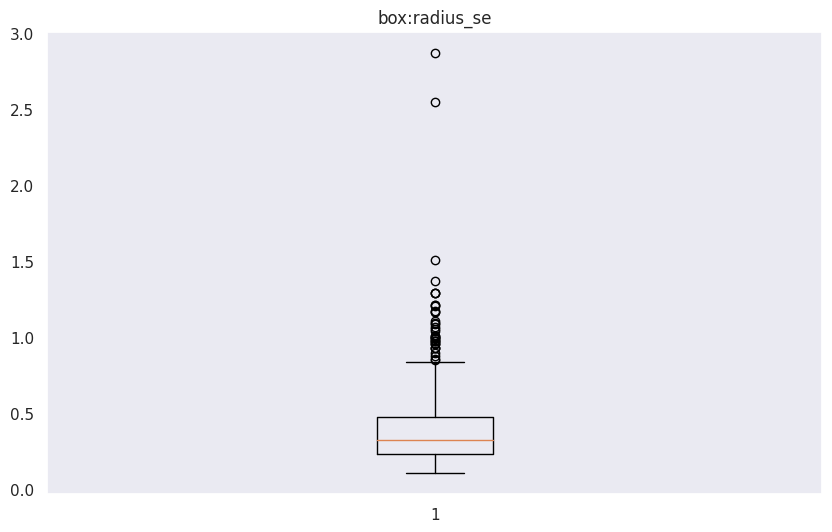

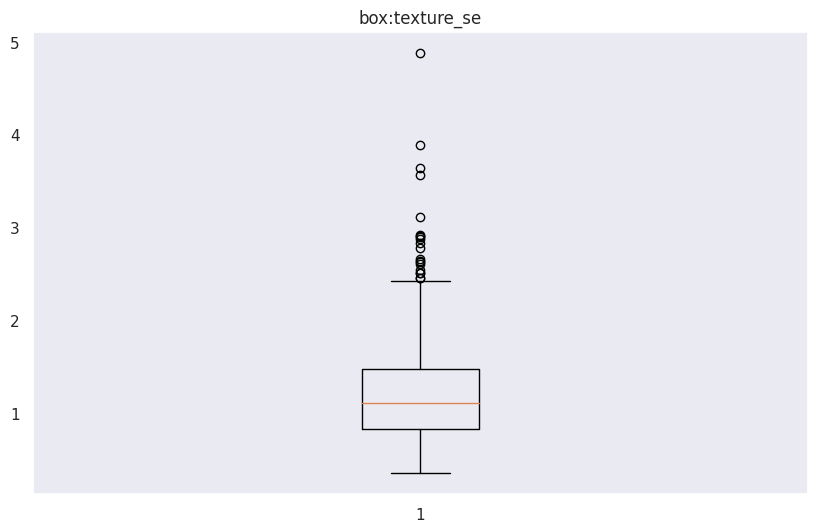

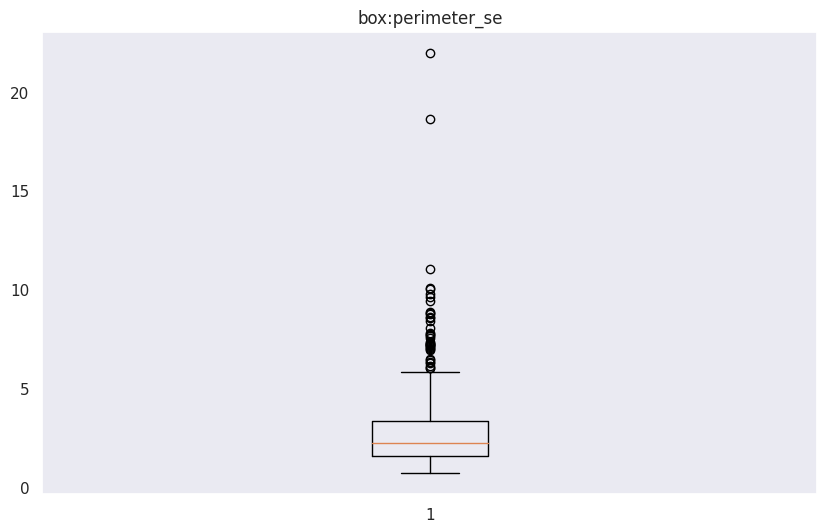

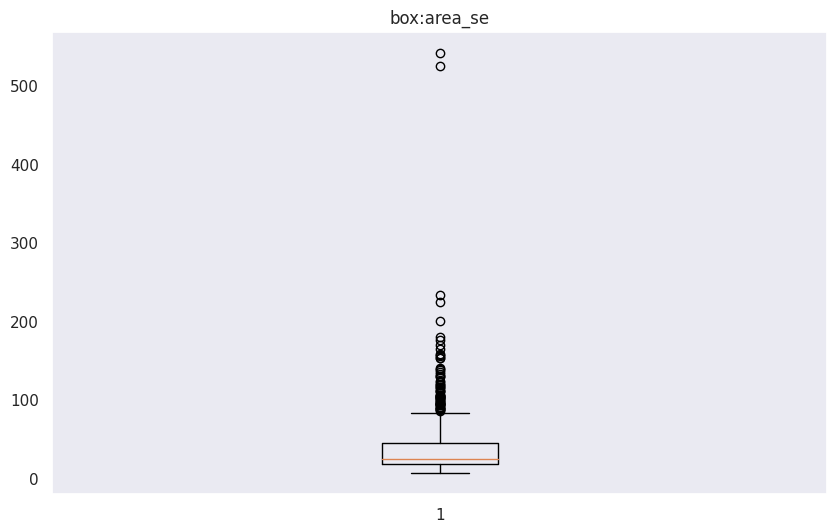

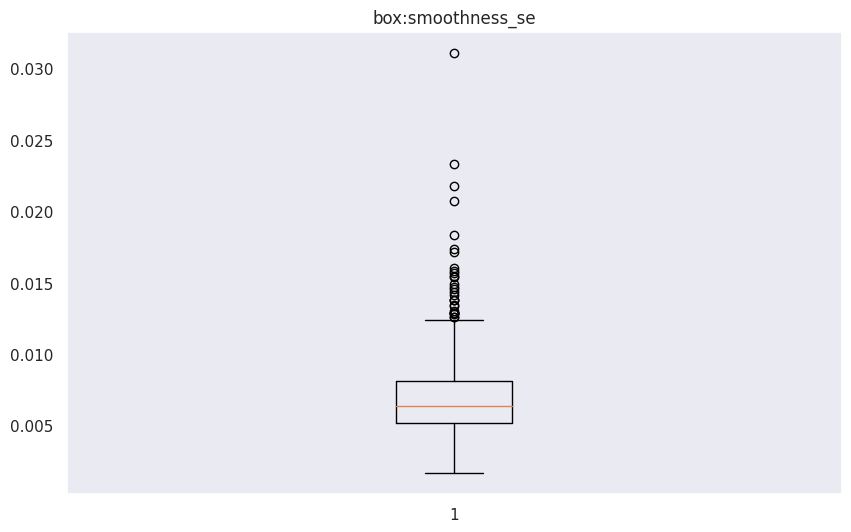

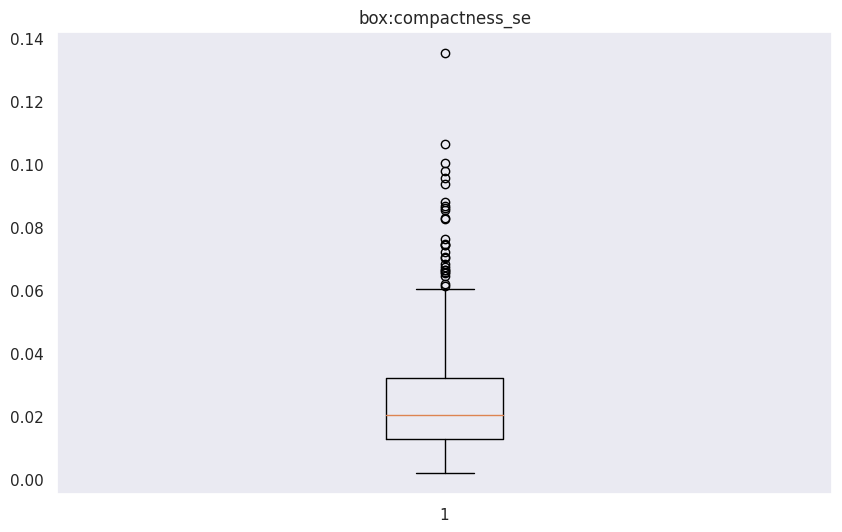

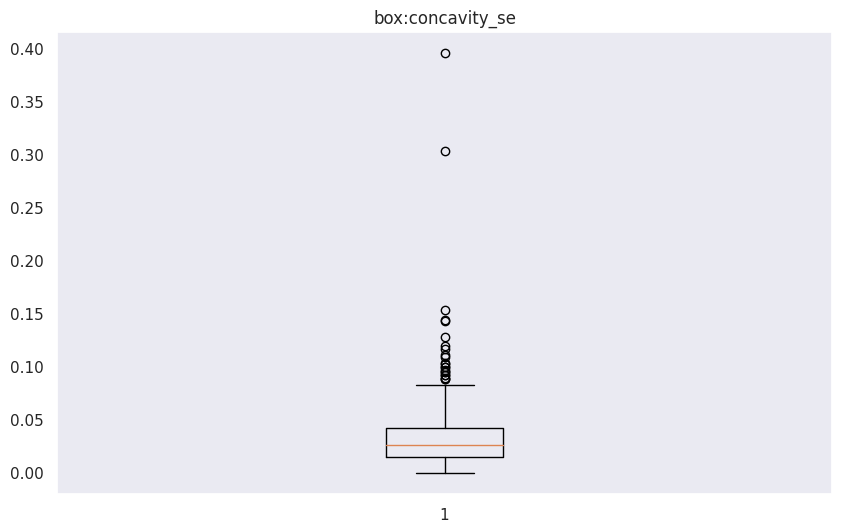

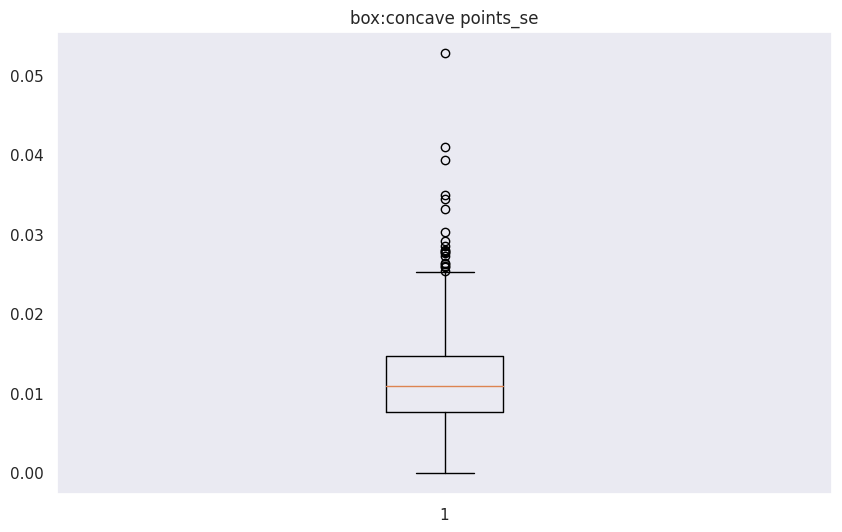

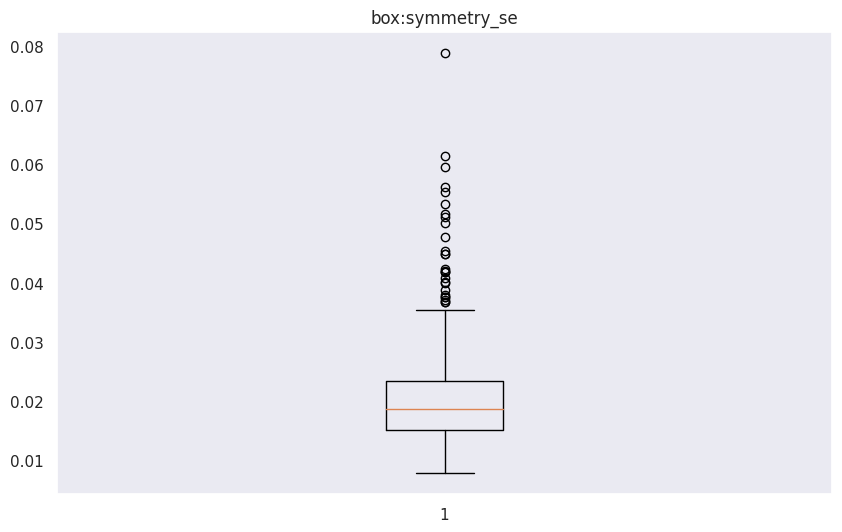

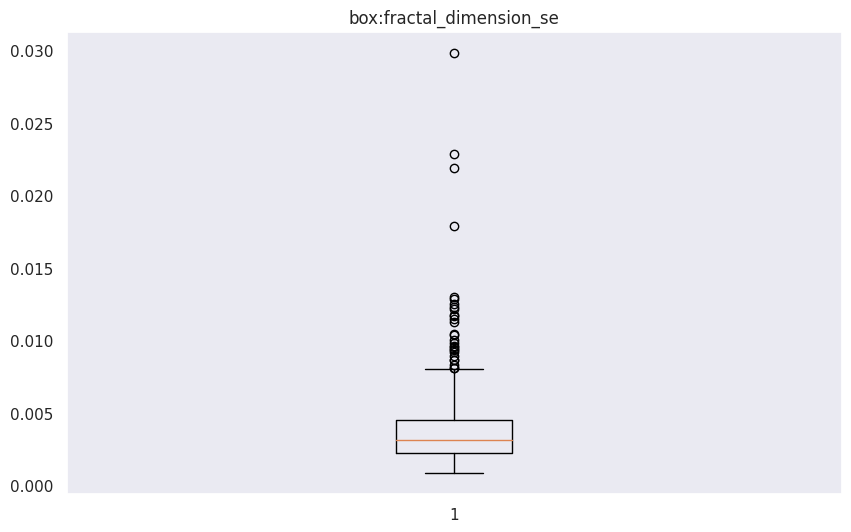

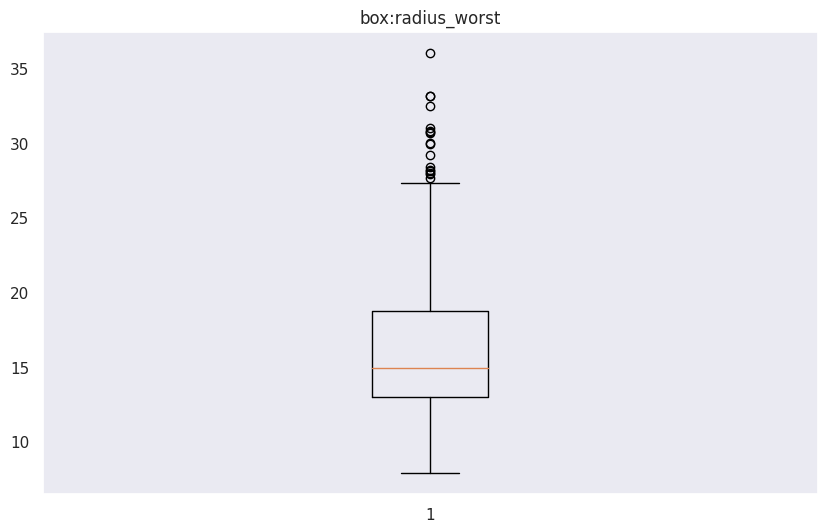

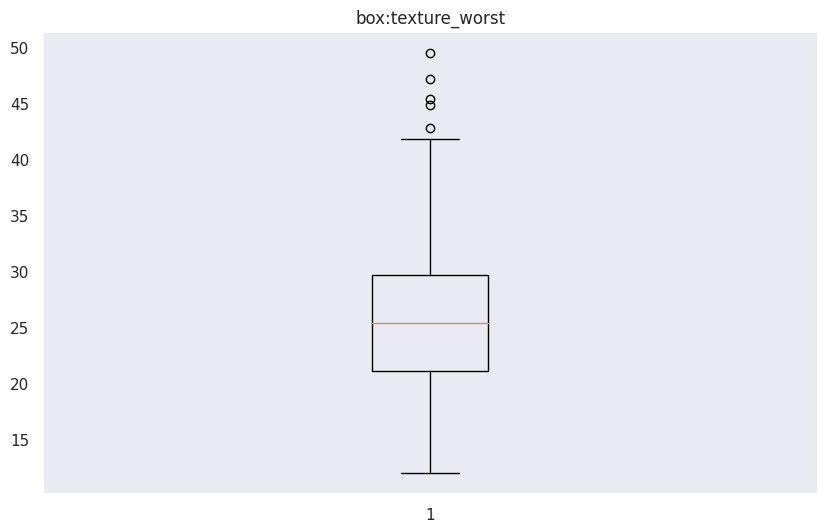

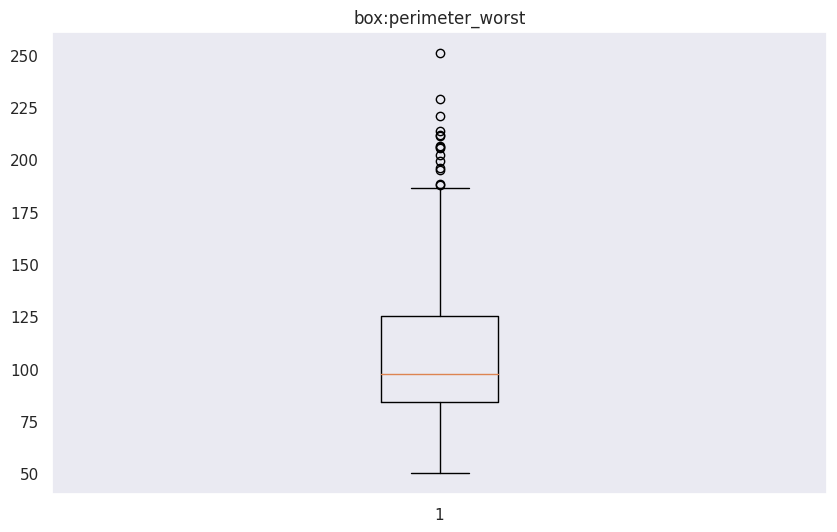

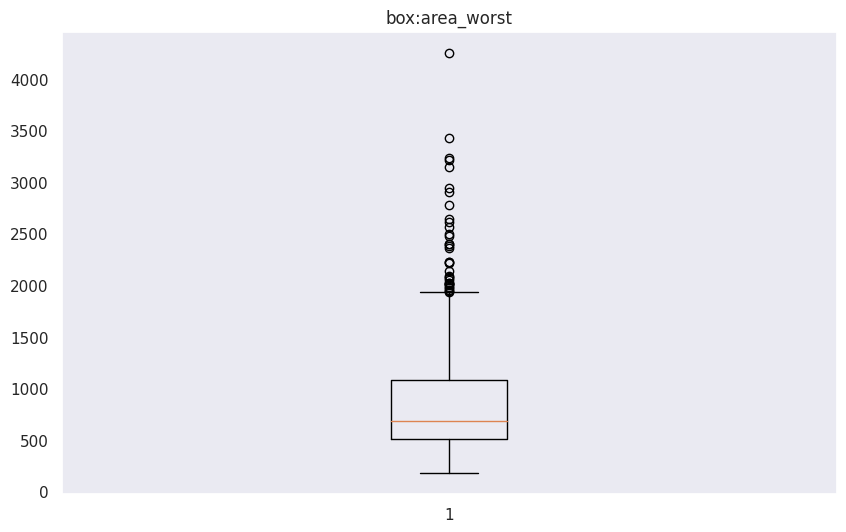

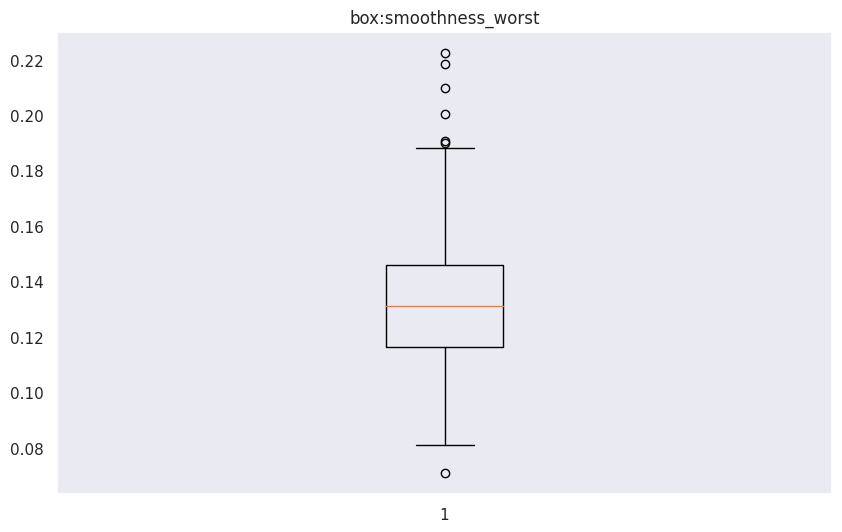

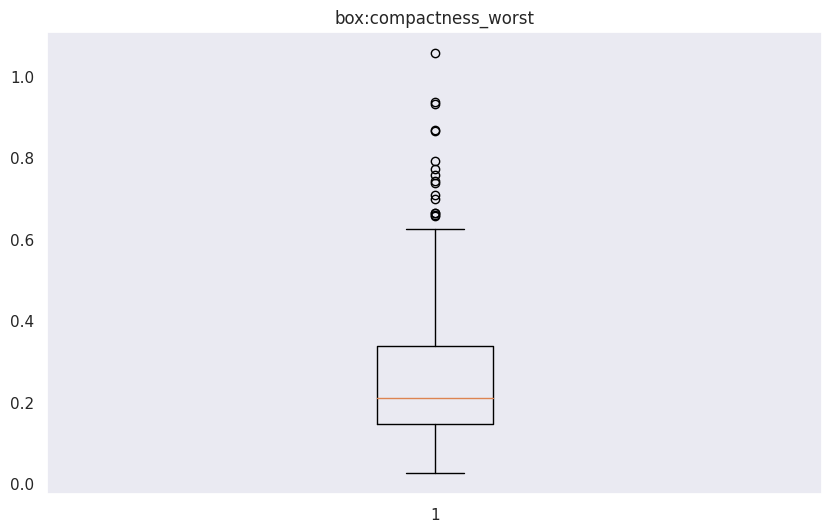

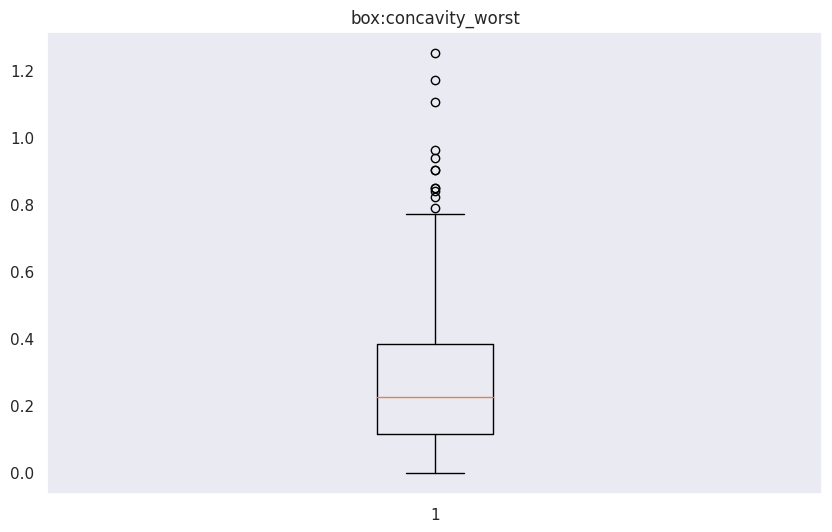

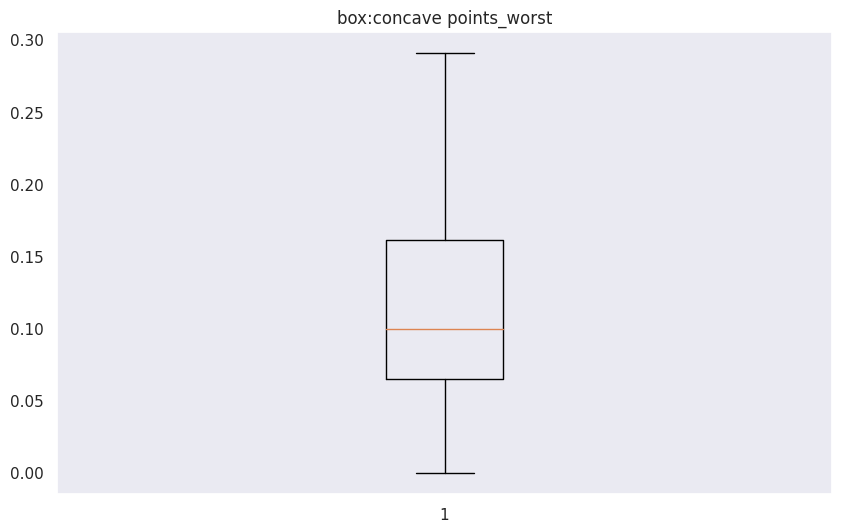

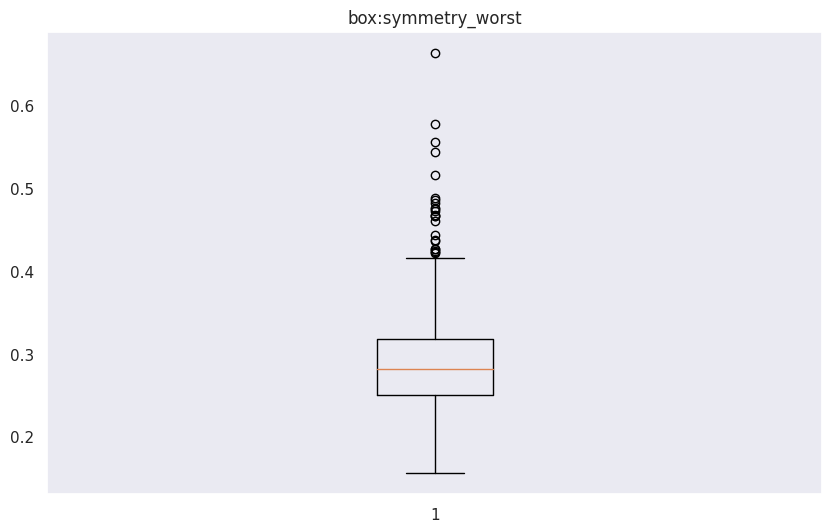

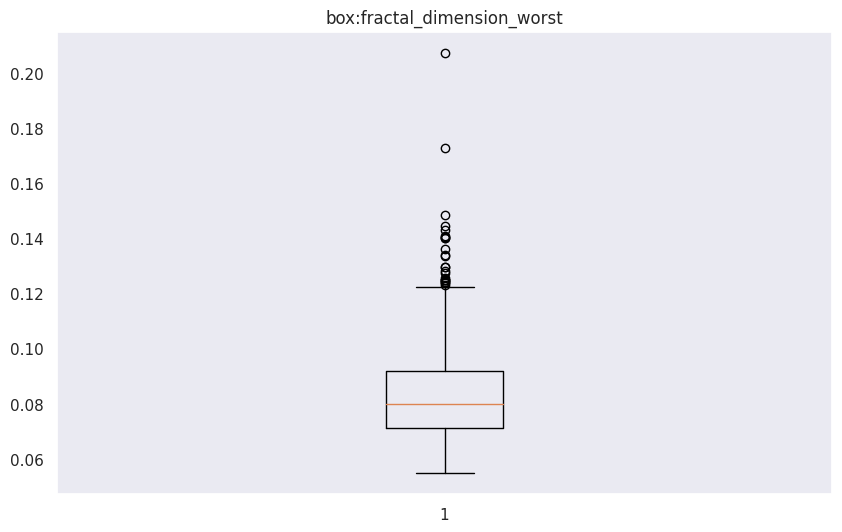

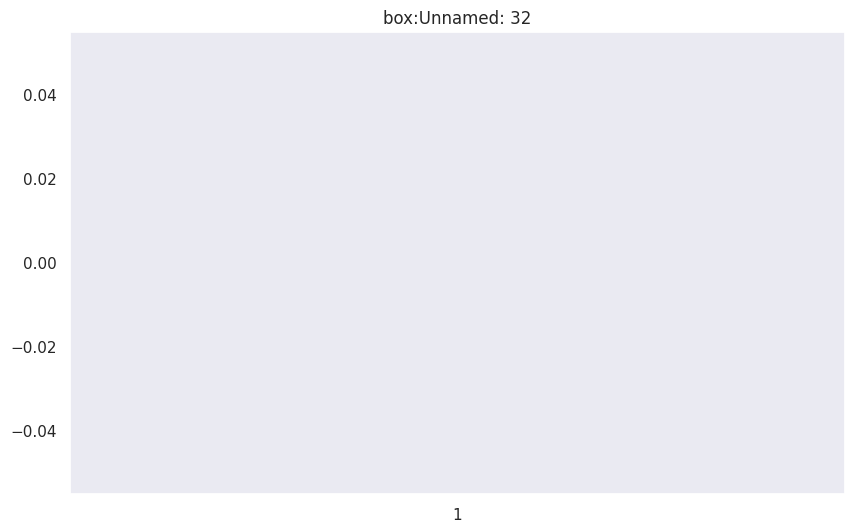

In [284]:
#se visualizan los diagramas de cajas para cada columna
for i in varibles_numericas1:
  plt.title('box:'+i)
  plt.boxplot(data[i])
  plt.grid()
  plt.show()

#**DATA2 CLEANING**



In [144]:
#se buscan valores faltantes
val_null = data.isnull().sum()
print(val_null)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [257]:
#eliminamos la columna con ceros que era justamente la ultima
data2 = data.dropna(axis = 1)

In [258]:
#veamos si hay valores duplicados
data2.duplicated()
#en este caso no hay filas duplicadas



0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [259]:
#visualizacion del DataFrame2 sin la ultima columna
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [260]:
#definicion de la variables categoricas y numericas (data2) para su uso en el procesamiento de datos
varibles_numericas = data2.select_dtypes(include = [np.number])
variables_categoricas = data2.select_dtypes(exclude= [np.number])

In [261]:
#definir solo las columnas numericas
columnas_numericas= (data2.columns).drop('diagnosis')


In [209]:
columnas_numericas

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [262]:
def tratar_outliers(df, columna):
    """
    Sustituye los outliers en una columna específica por los percentiles 25 o 75.
    Un valor se considera outlier si está fuera de 1.5 * IQR.
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = df[columna].clip(lower=limite_inferior, upper=limite_superior)
    return df

In [ ]:
for i in columnas_numericas:
  tratar_outliers(data2, i)

In [212]:
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,20728995.5,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,20728995.5,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,20728995.5,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,M,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,926682.0,M,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,926954.0,M,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


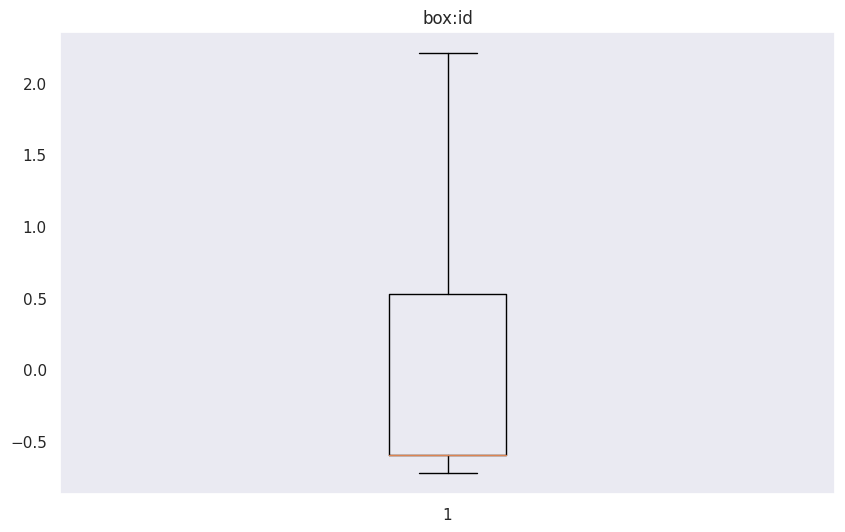

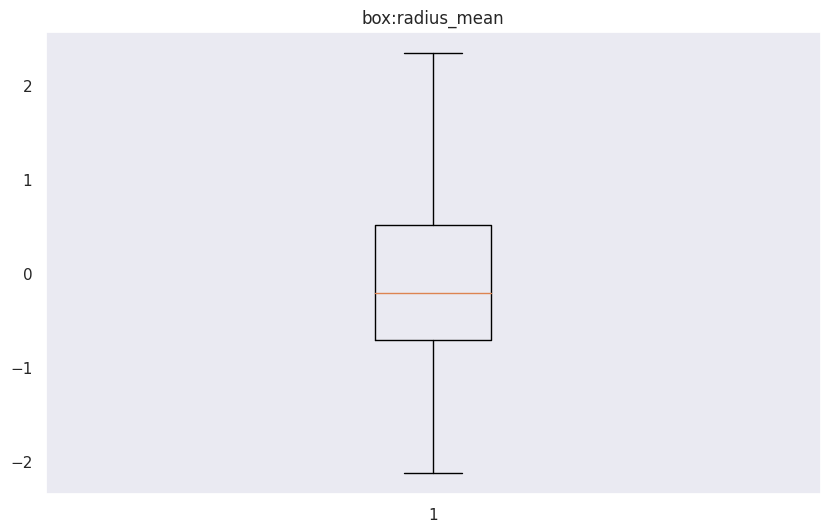

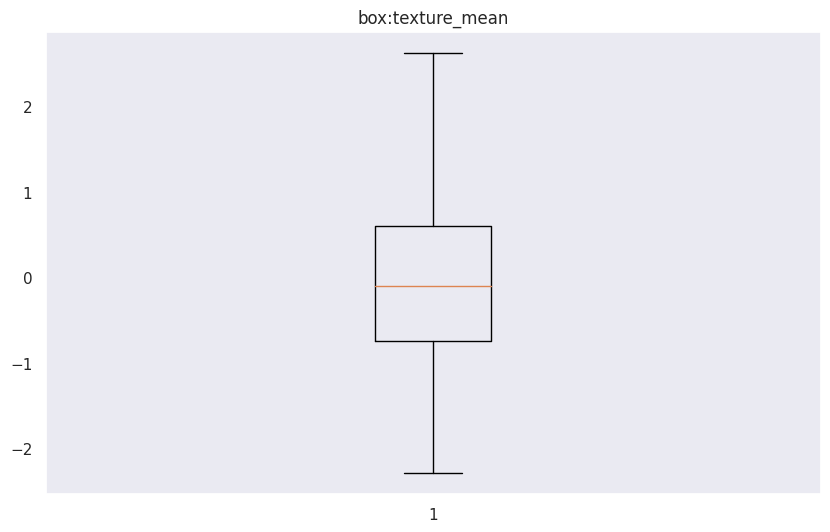

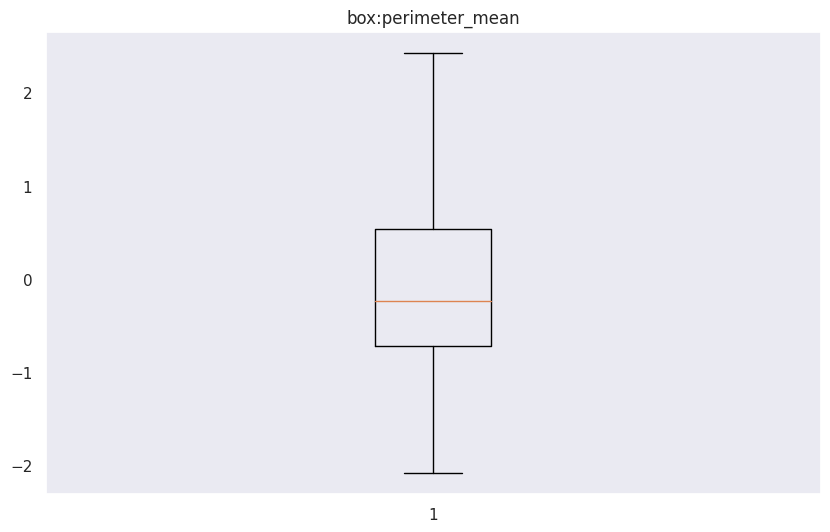

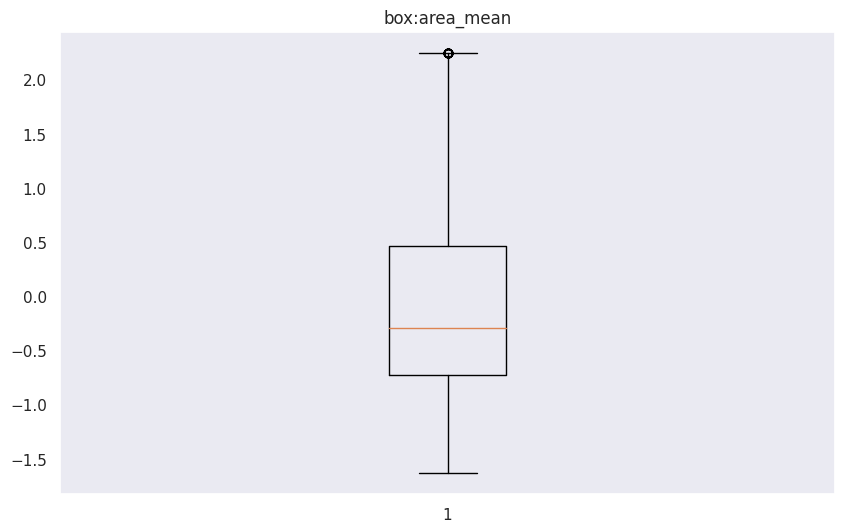

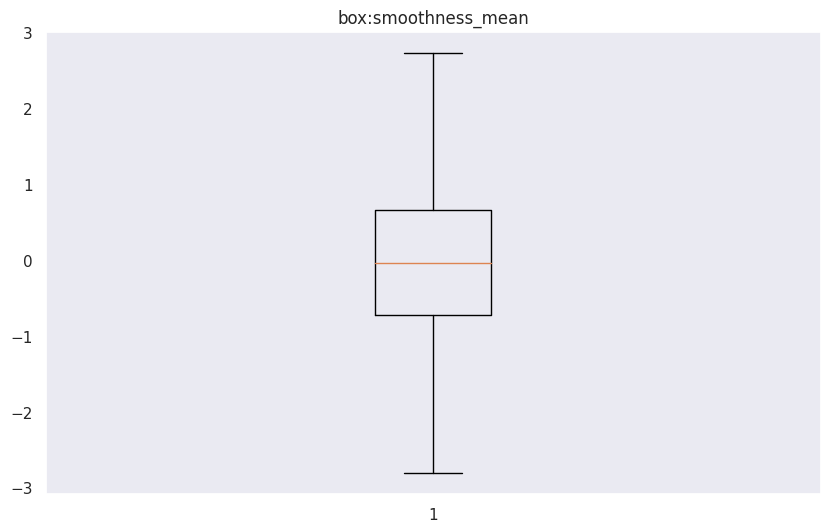

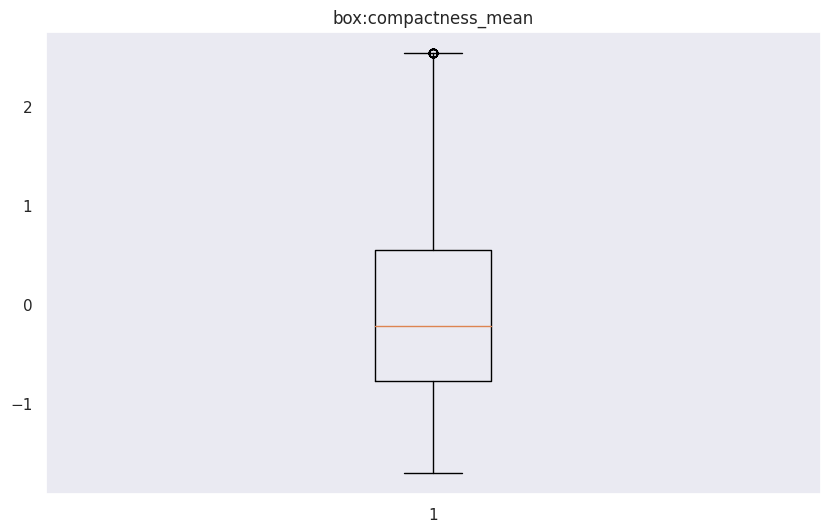

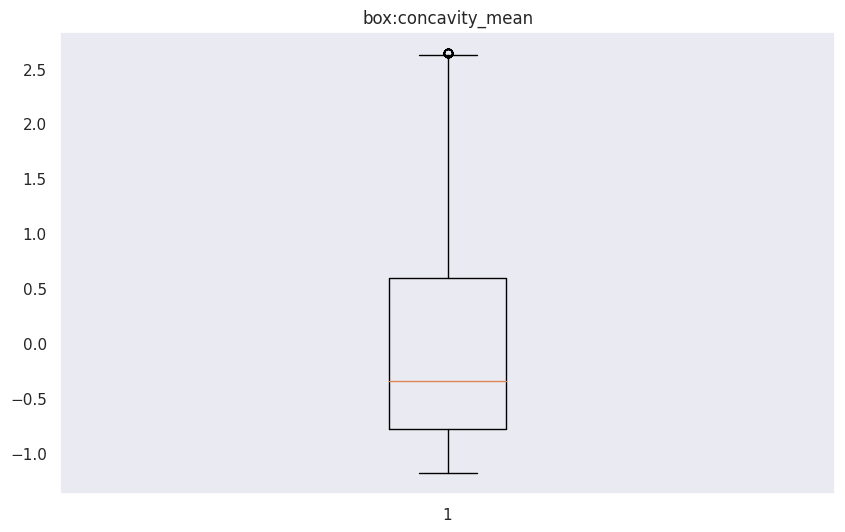

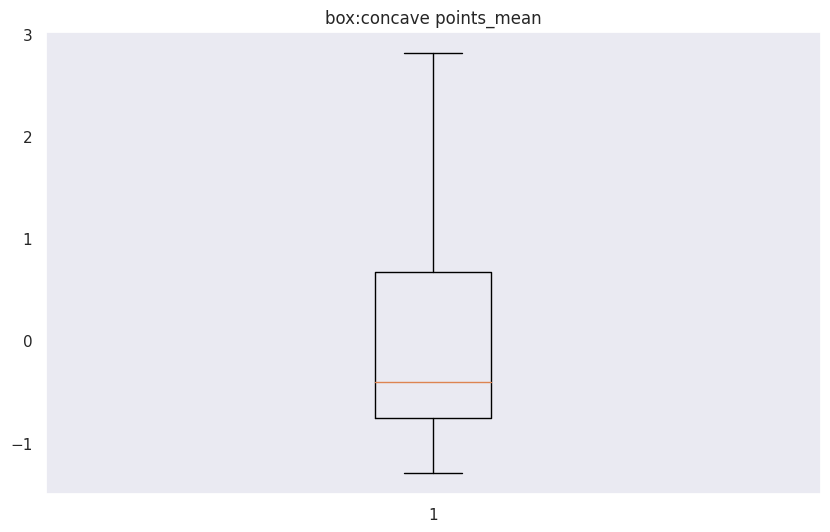

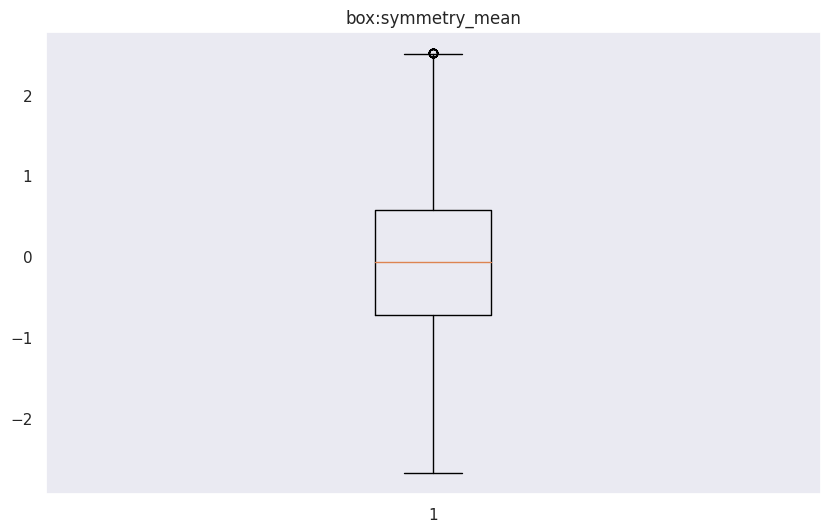

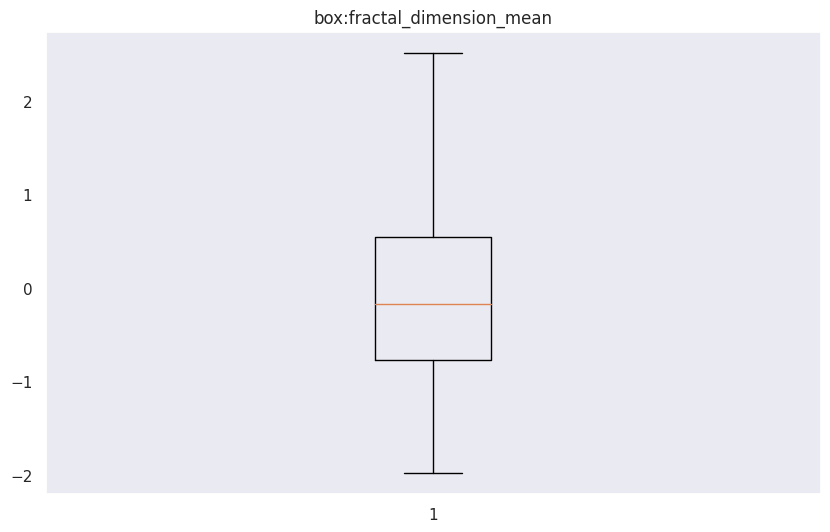

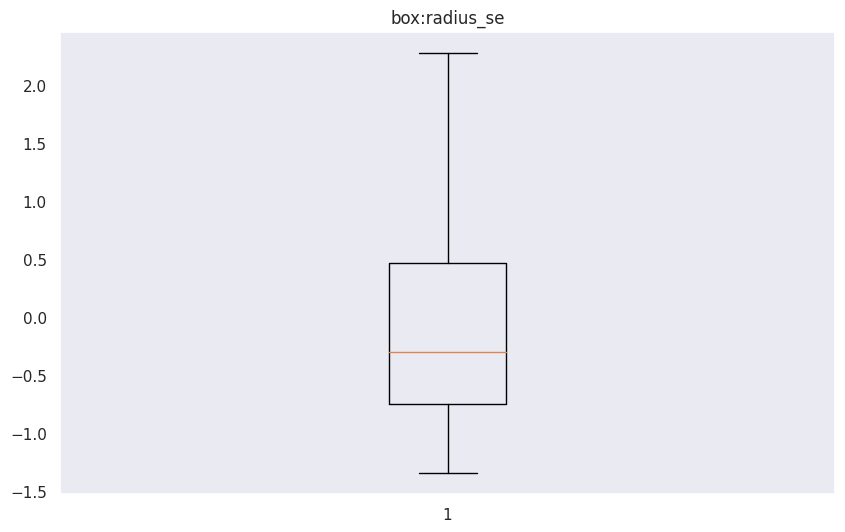

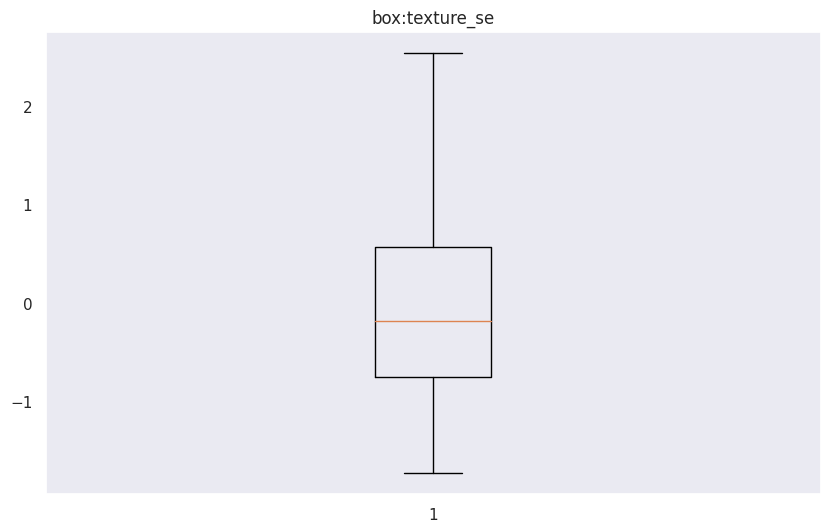

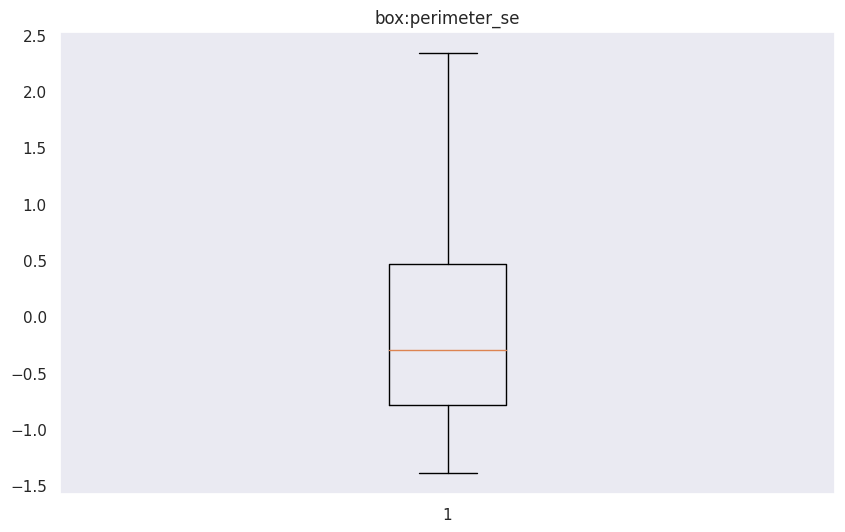

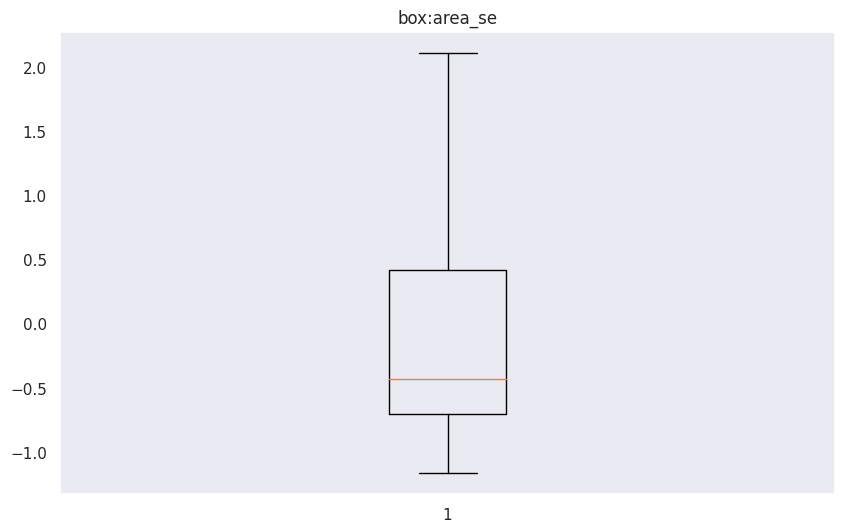

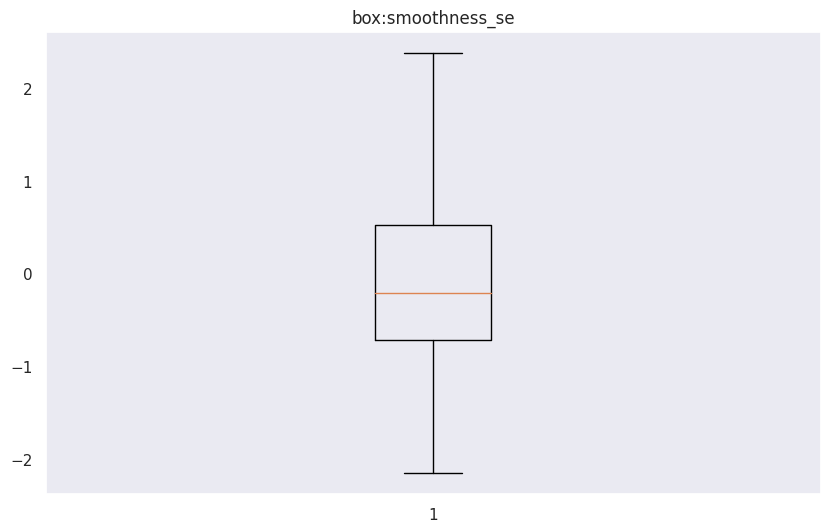

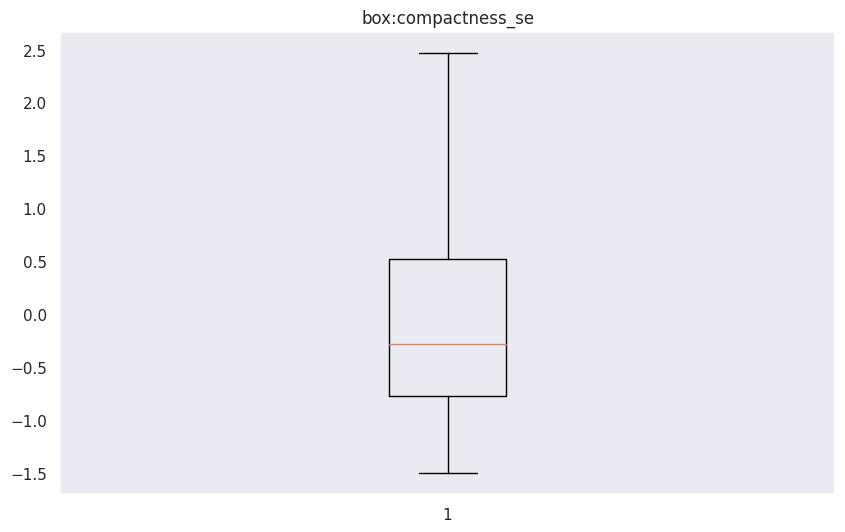

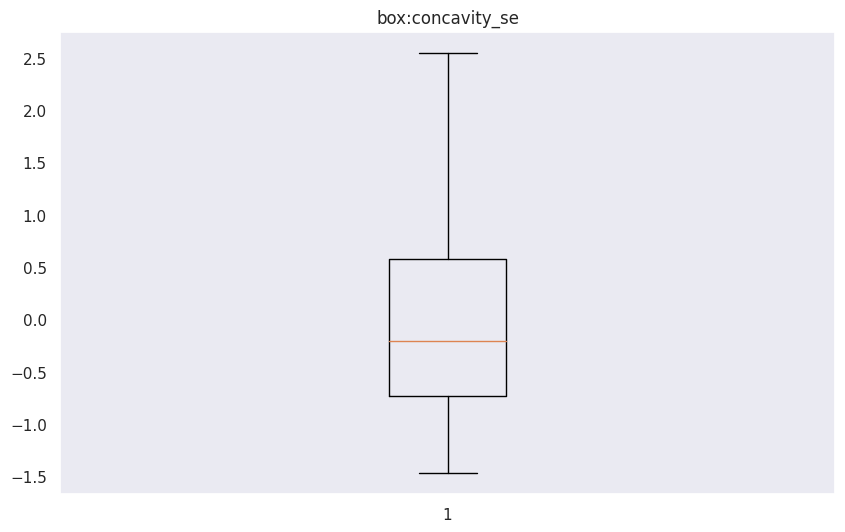

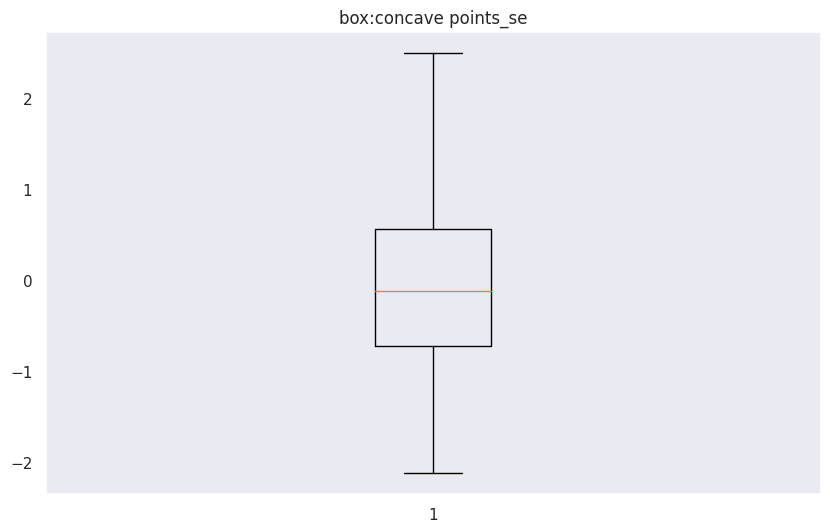

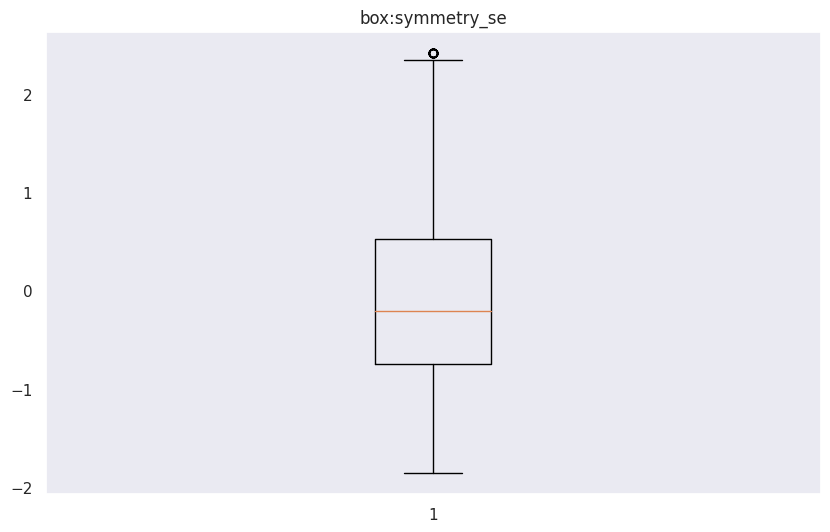

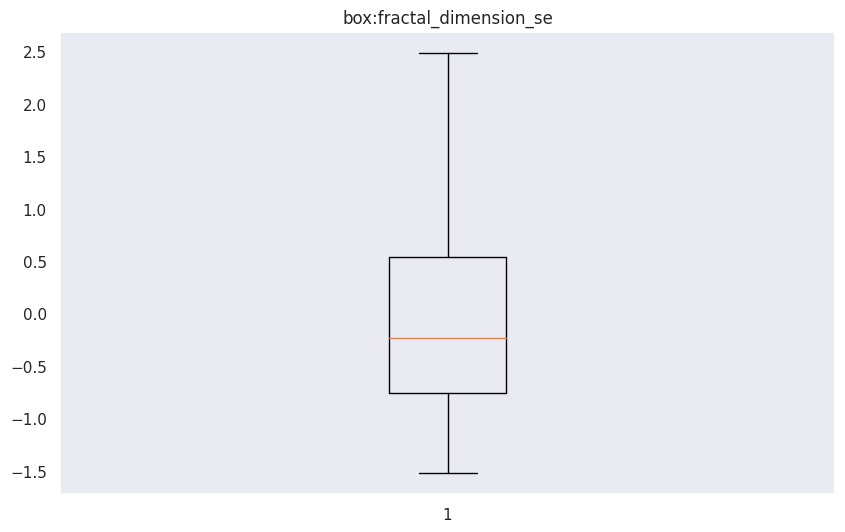

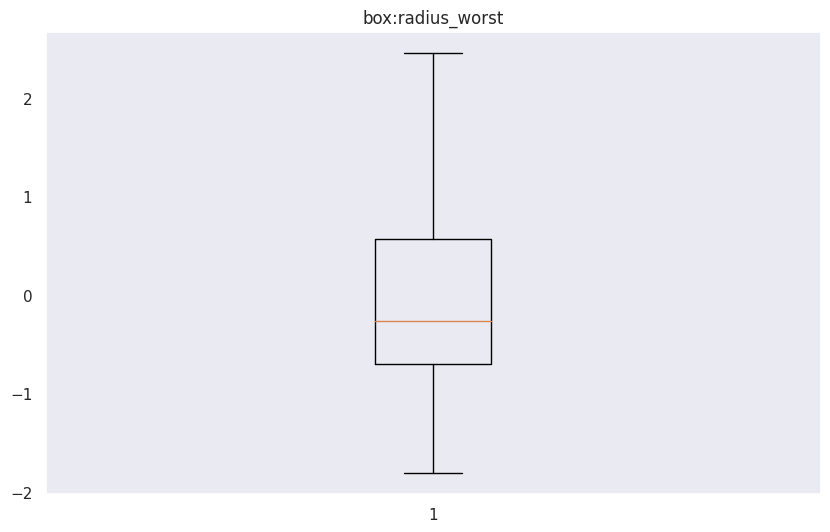

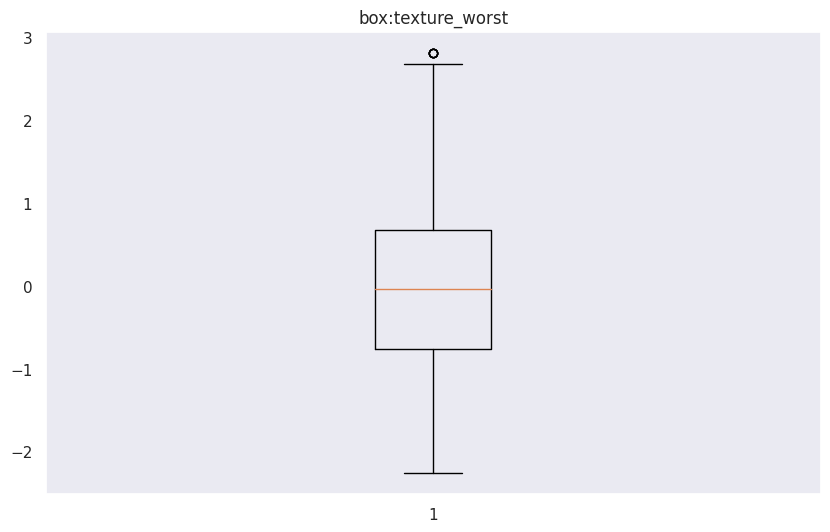

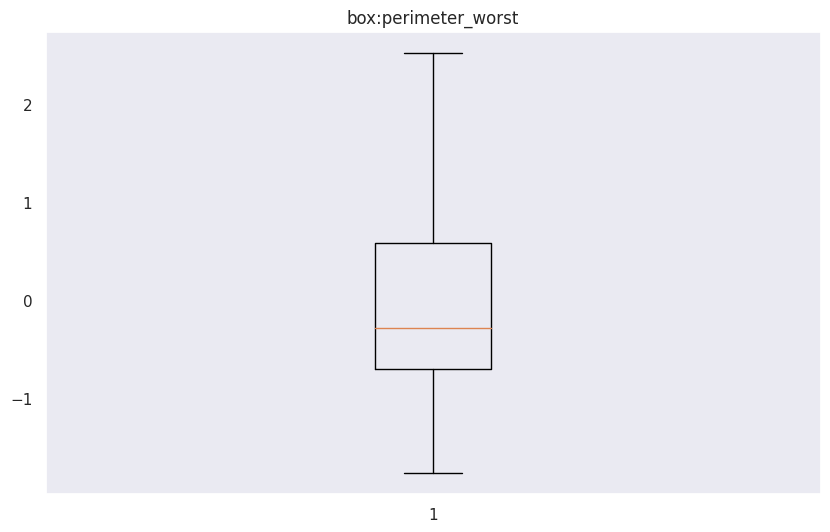

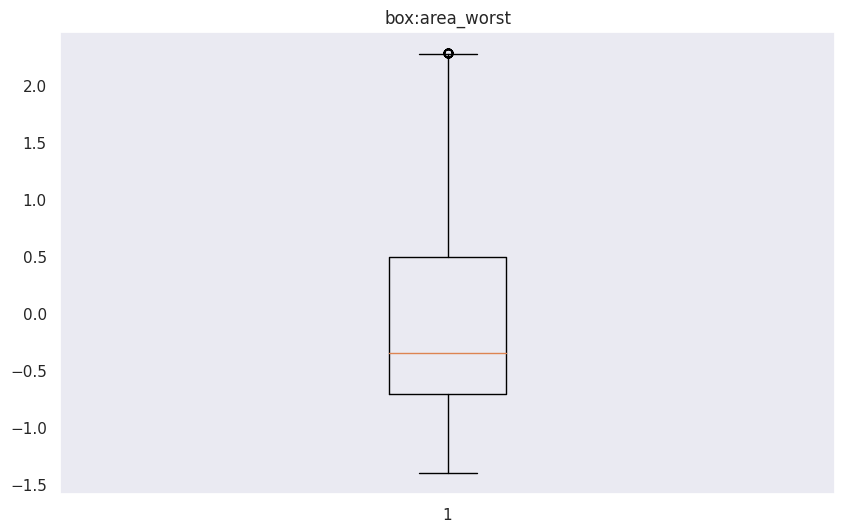

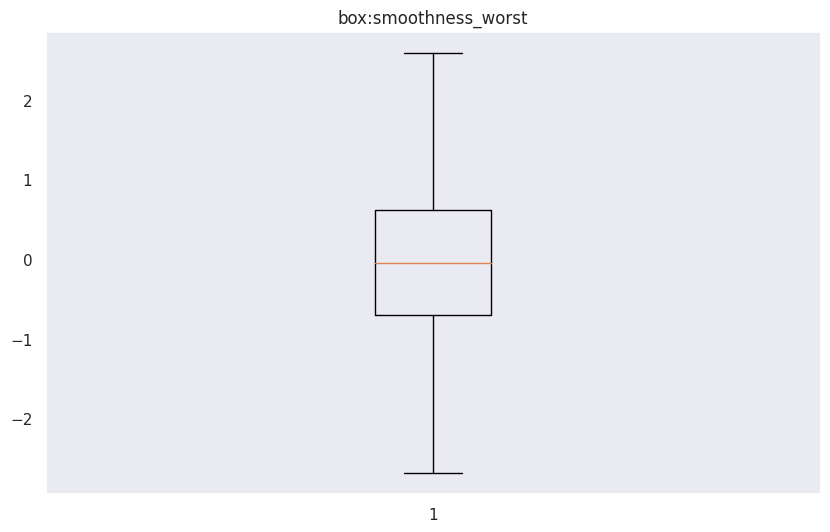

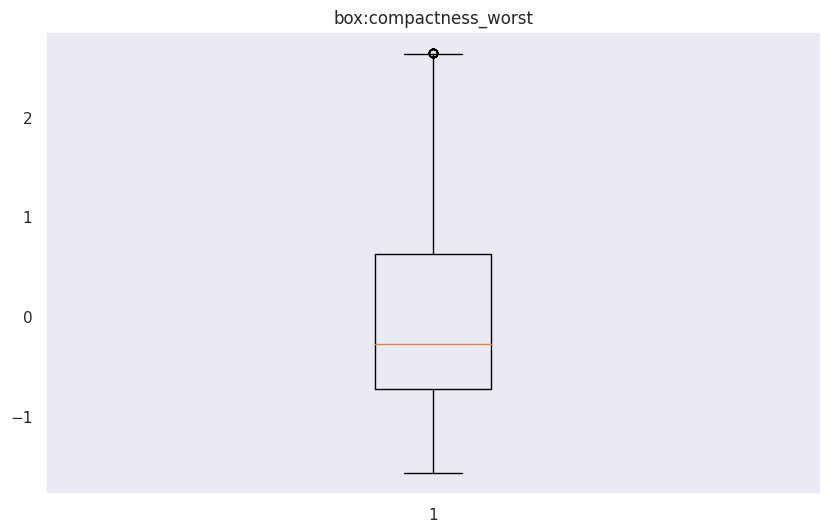

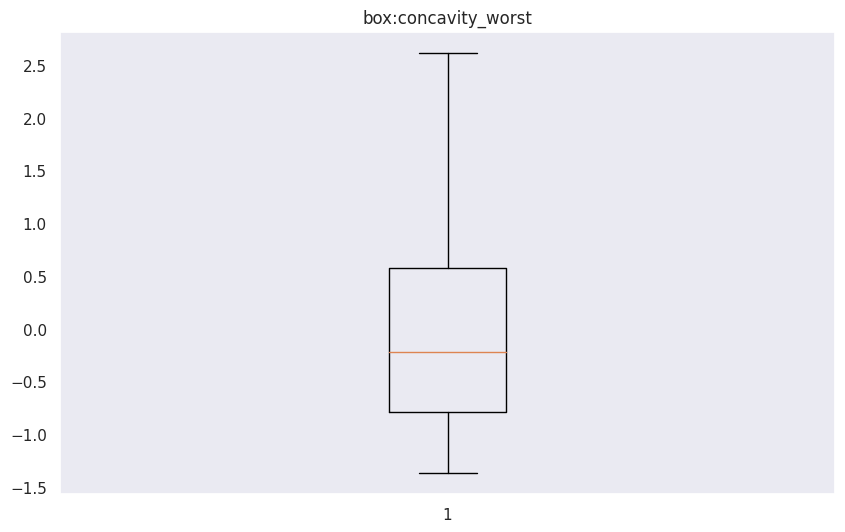

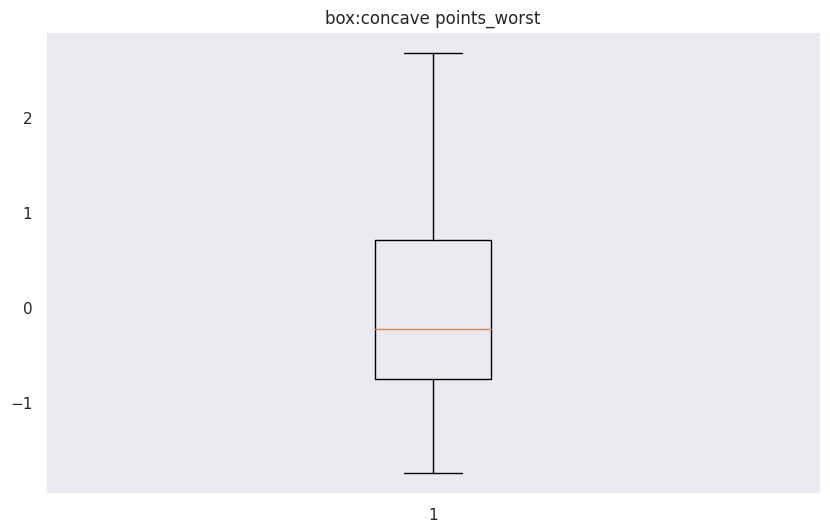

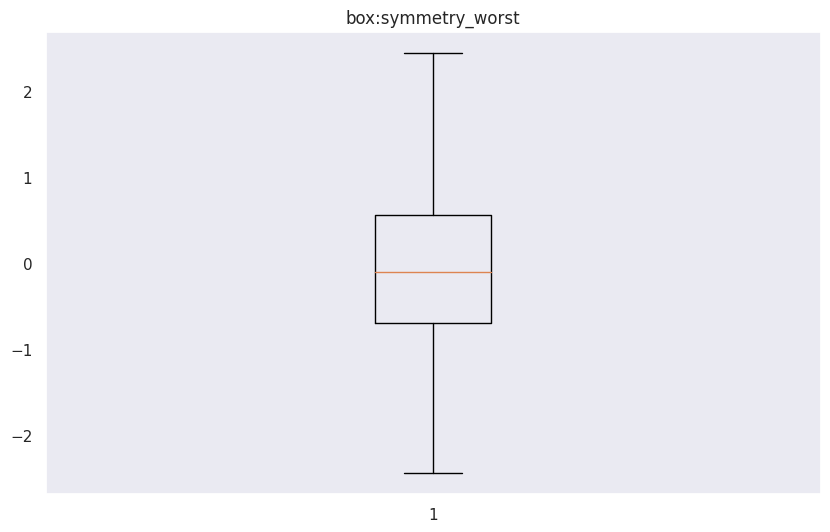

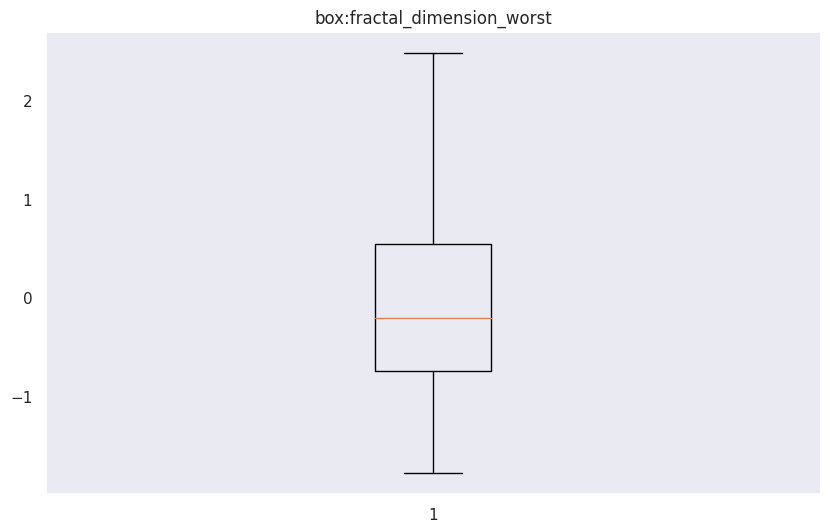

In [285]:
#solo para visualizacion del tratamiento de valores atipicos
for i in columnas_numericas:
  plt.title('box:'+i)
  plt.boxplot(data2[i])
  plt.grid()
  plt.show()

In [264]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def estandarizar_datos(data, columnas_numericas):

    """
    Estandariza las columnas numéricas del DataFrame para que tengan media 0 y desviación estándar 1.
    """
    escalador = StandardScaler()
    data[columnas_numericas] = escalador.fit_transform(data[columnas_numericas])
    return data

In [265]:
#para un manejo mas facil, se realiza una normalizacion de los datos
estandarizar_datos(data2, columnas_numericas)

<ipython-input-264-88e715e281c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columnas_numericas] = escalador.fit_transform(data[columnas_numericas])


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.602924,M,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,...,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,-0.602894,M,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,...,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,2.212145,M,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,...,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,2.212145,M,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,...,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,2.212145,M,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,...,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.591016,M,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,...,2.021750,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016
565,-0.590980,M,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,...,1.637740,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155
566,-0.590941,M,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,...,0.610078,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817
567,-0.590901,M,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,...,2.085025,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456


In [266]:
varibles_numericas.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

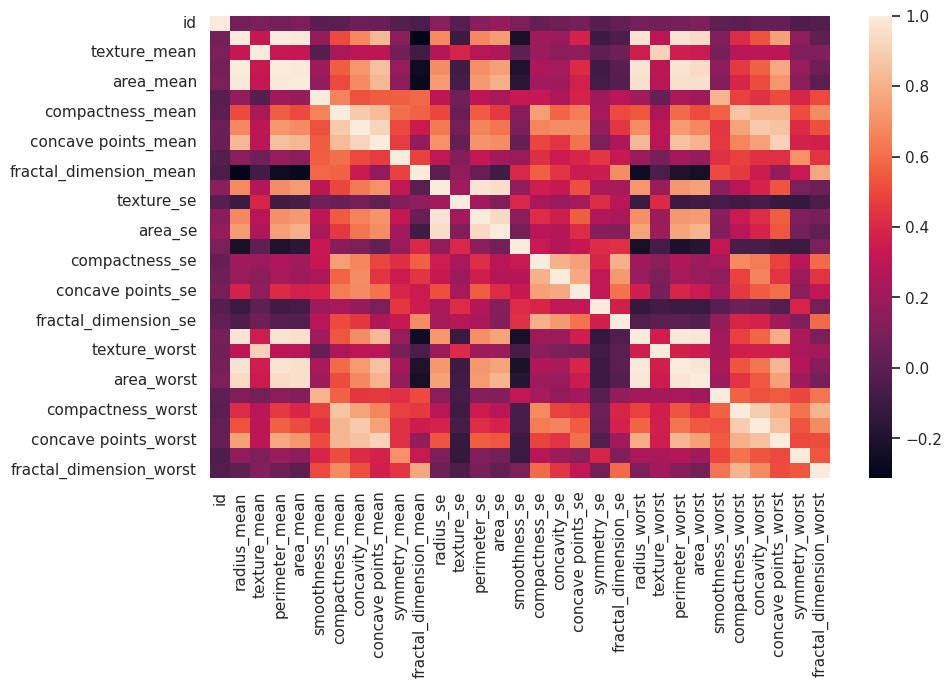

In [267]:


corr_matrix = varibles_numericas.corr()
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(corr_matrix,annot=False,fmt=".01"

In [268]:
# Eliminación de redundancia columnar
def eliminar_redundancia_columnar(data, umbral_correlacion=0.9):
    """
    Elimina columnas altamente correlacionadas para evitar la multicolinealidad.
    """
    matriz_corr = data.corr().abs()
    triangulo_superior = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(bool))
    columnas_a_eliminar = [columna for columna in triangulo_superior.columns if any(triangulo_superior[columna] > umbral_correlacion)]
    data = data.drop(columnas_a_eliminar, axis=1)
    return data

In [269]:
data3 = data2.drop(['diagnosis'], axis=1)

eliminar_redundancia_columnar(data3, 0.9)

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,-0.602924,1.176800,-2.121200,1.618861,2.541404,2.647422,2.348535,2.511708,2.280613,-0.603532,-0.197982,1.639184,1.152362,0.778698,1.520305,1.462719,1.344848,2.641905,2.443918,2.225247
1,-0.602894,1.949929,-0.354875,-0.842995,-0.498189,-0.000497,0.017882,-0.925449,0.780609,-0.956881,-0.685568,-0.768782,-0.556348,0.328106,-0.937631,-0.033315,-0.377098,-0.443388,-0.234408,0.355314
2,2.212145,1.686226,0.476899,0.975239,1.148680,1.496076,1.004666,-0.407692,1.774057,-0.847619,-0.301397,1.037862,0.402825,1.637925,0.373573,0.550819,0.546654,1.223448,1.369057,0.265197
3,2.212145,-0.791983,0.268955,2.737521,2.541404,2.091997,2.521318,2.517947,0.545151,-0.086703,0.927950,2.473870,1.292444,1.289491,2.423376,2.491558,2.595949,2.641905,2.443918,2.482456
4,2.212145,1.866023,-1.174698,0.295047,0.599453,1.504202,0.006363,-0.588595,1.831079,-0.859164,1.916411,0.003294,1.305576,1.322328,-0.378732,0.856659,0.232758,-0.314469,-0.951602,-0.410683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.591016,2.246595,0.749377,1.077633,0.256947,2.125856,-0.312326,-0.994068,2.280613,0.119452,1.422181,0.291232,1.067242,2.360332,-1.356424,0.364166,0.394190,-0.270329,-1.516438,-0.763016
565,-0.590980,1.818077,2.150007,0.112199,0.003614,0.772845,-0.212495,-1.134424,1.871878,2.548261,-0.459634,-0.022152,0.460220,0.944706,-0.162482,-0.614637,-0.699963,-0.404152,-0.565135,-1.062155
566,-0.590941,0.760269,2.109375,-0.856891,-0.018680,0.075483,-0.834515,-0.955080,0.352458,-0.253688,-0.403981,0.853716,0.839609,0.723970,-1.045756,0.169080,-0.821037,0.417005,-1.222872,-0.321817
567,-0.590901,1.958919,2.408144,1.574978,2.541404,2.647422,2.264063,1.178328,1.677711,0.818315,-0.146898,2.473870,2.000636,0.919166,0.486266,1.458221,1.470406,2.641905,2.249756,2.482456


In [279]:
#para ver la cardinalidad de cada columna, como todas nuestras columnas son numricas no hace falta aplicar ningun metodo
#de reduccion de cardinalidad. la columna 'diagnosis' es la unica categorica y se usara para el arbol
for i in data3:
  print('numero de variables de la columna: \t', i, len(data3['area_mean']))

numero de variables de la columna: 	 id 569
numero de variables de la columna: 	 radius_mean 569
numero de variables de la columna: 	 texture_mean 569
numero de variables de la columna: 	 perimeter_mean 569
numero de variables de la columna: 	 area_mean 569
numero de variables de la columna: 	 smoothness_mean 569
numero de variables de la columna: 	 compactness_mean 569
numero de variables de la columna: 	 concavity_mean 569
numero de variables de la columna: 	 concave points_mean 569
numero de variables de la columna: 	 symmetry_mean 569
numero de variables de la columna: 	 fractal_dimension_mean 569
numero de variables de la columna: 	 radius_se 569
numero de variables de la columna: 	 texture_se 569
numero de variables de la columna: 	 perimeter_se 569
numero de variables de la columna: 	 area_se 569
numero de variables de la columna: 	 smoothness_se 569
numero de variables de la columna: 	 compactness_se 569
numero de variables de la columna: 	 concavity_se 569
numero de variables 

In [280]:
data3

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.602924,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,...,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,-0.602894,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,...,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,2.212145,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,...,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,2.212145,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,...,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,2.212145,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,...,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.591016,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,...,2.021750,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016
565,-0.590980,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,...,1.637740,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155
566,-0.590941,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,...,0.610078,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817
567,-0.590901,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,...,2.085025,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456


In [271]:
len(data3.columns)

31

#**Modelado de datos - Random Forest**

In [272]:
#usando rando tree comenzamos por dividimos por etiquetas los datos
data3.columns


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [273]:
#dividir en x y y
x = data3[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = data['diagnosis']

In [283]:
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



#Árbol de decisión
ad=tree.DecisionTreeClassifier(max_features=3)

#Bosque aleatorio
rf = RandomForestClassifier(n_estimators=30  , random_state=0)


# Entrenar el modelo
rf=rf.fit(x_train, y_train)
ad=ad.fit(x_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_rf = rf.predict(x_test)
y_pred_ad = ad.predict(x_test)

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ad = accuracy_score(y_test, y_pred_ad)
print(f'Precisión del modelo Random Forest: {accuracy_rf:.2f}')
print(f'Precisión del modelo Desicion Tree: {accuracy_ad:.2f}')

Precisión del modelo Random Forest: 0.96
Precisión del modelo Desicion Tree: 0.93


#**Resultados**

[Text(0.6473214285714286, 0.9444444444444444, 'x[4] <= 0.189\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.4375, 0.8333333333333334, 'x[7] <= 0.227\ngini = 0.233\nsamples = 319\nvalue = [276, 43]'),
 Text(0.26785714285714285, 0.7222222222222222, 'x[14] <= 0.349\ngini = 0.091\nsamples = 272\nvalue = [259, 13]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[21] <= -0.094\ngini = 0.059\nsamples = 264\nvalue = [256, 8]'),
 Text(0.07142857142857142, 0.5, 'x[22] <= 1.299\ngini = 0.008\nsamples = 235\nvalue = [234, 1]'),
 Text(0.03571428571428571, 0.3888888888888889, 'gini = 0.0\nsamples = 221\nvalue = [221, 0]'),
 Text(0.10714285714285714, 0.3888888888888889, 'x[0] <= -0.58\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.2777777777777778, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.21428571428571427, 0.5, 'x[22] <= 0.195\ngini = 0.366\nsamples =

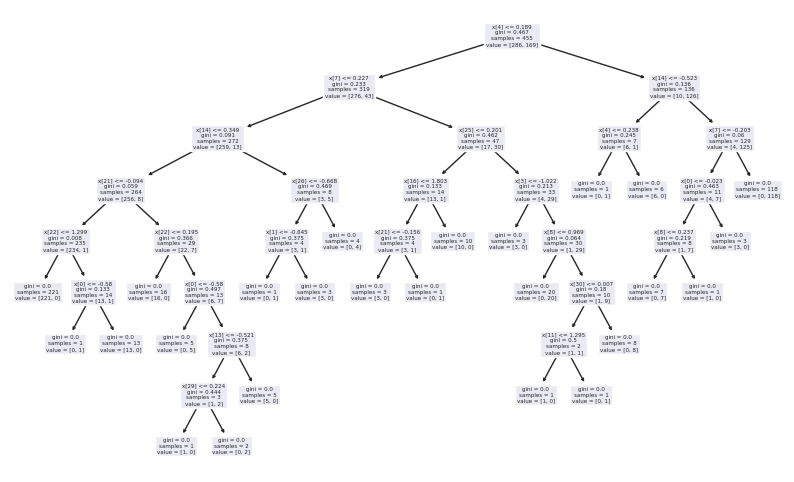

In [223]:
tree.plot_tree(ad)

#**Evaluación**

In [275]:
#evaluacion de la precision de la prediccion
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [276]:
report_ad = classification_report(y_test, y_pred_ad)
print(report_ad)

              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

